In [2]:
import pandas as pd
from darts import TimeSeries

In [3]:
# Load the dataset
data = pd.read_csv('practise_data_with_ABN_till_dec.csv')
data

,MaterialNumber,04-01-2015,05-01-2015,06-01-2015,07-01-2015,08-01-2015,09-01-2015,10-01-2015,11-01-2015,12-01-2015,...,03-01-2022,04-01-2022,05-01-2022,06-01-2022,07-01-2022,08-01-2022,09-01-2022,10-01-2022,11-01-2022,12-01-2022
0,AB,0,0,0,0,0,0,0,0,0,...,49,84,81,2229,940,401,559,911,1529,442
1,ABC,0,0,0,0,0,0,0,0,0,...,76,58,159,2316,1080,600,1227,1516,1569,648
2,ABCD,0,0,0,0,0,0,0,0,0,...,65,42,83,4822,1460,809,1436,2003,2018,836
3,ABCDE,0,0,0,0,0,0,0,0,0,...,45,11,25,932,544,287,225,440,521,200
4,ABCDEF,0,0,0,0,0,0,0,0,0,...,17,5,10,796,458,197,131,352,280,101
5,ABCDEFG,0,0,0,0,0,0,0,0,0,...,13,1,3,714,476,167,67,231,216,104
6,ABCDEFGH,0,0,0,0,0,0,0,0,0,...,0,0,0,2235,803,353,320,599,676,163
7,ABCDEFGHI,0,0,0,0,0,0,0,0,0,...,0,0,0,1046,384,265,288,518,443,148
8,ABCDEFGHIJ,0,0,0,0,0,0,0,0,0,...,0,0,0,939,633,337,339,511,572,257
9,ABCDEFGHIJK,0,0,0,0,0,0,0,0,0,...,44,38,85,1971,726,373,262,530,751,289


In [4]:
# Reshape the data to long format
data_long = pd.melt(data, id_vars=['MaterialNumber'], var_name='Date', value_name='Count')
data_long

,MaterialNumber,Date,Count
0,AB,04-01-2015,0
1,ABC,04-01-2015,0
2,ABCD,04-01-2015,0
3,ABCDE,04-01-2015,0
4,ABCDEF,04-01-2015,0
...,...,...,...
1297,ABCDEFGHIJK,12-01-2022,289
1298,ABCDEFGHIJKL,12-01-2022,30
1299,ABCDEFGHIJKLM,12-01-2022,78
1300,ABCDEFGHIJKLMN,12-01-2022,113


In [5]:
# Convert the 'Date' column to datetime
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%m-%d-%Y', errors='coerce')
data_long

,MaterialNumber,Date,Count
0,AB,2015-04-01,0
1,ABC,2015-04-01,0
2,ABCD,2015-04-01,0
3,ABCDE,2015-04-01,0
4,ABCDEF,2015-04-01,0
...,...,...,...
1297,ABCDEFGHIJK,2022-12-01,289
1298,ABCDEFGHIJKL,2022-12-01,30
1299,ABCDEFGHIJKLM,2022-12-01,78
1300,ABCDEFGHIJKLMN,2022-12-01,113


In [6]:
# Filter for a single material for analysis
material = data_long[data_long['MaterialNumber'] == 'AB']  # Replace 'AB' with the desired material number
material

,MaterialNumber,Date,Count
0,AB,2015-04-01,0
14,AB,2015-05-01,0
28,AB,2015-06-01,0
42,AB,2015-07-01,0
56,AB,2015-08-01,0
...,...,...,...
1232,AB,2022-08-01,401
1246,AB,2022-09-01,559
1260,AB,2022-10-01,911
1274,AB,2022-11-01,1529


In [7]:
material.isna().sum()

MaterialNumber    0
Date              0
Count             0
dtype: int64

In [8]:
AB = material.drop(columns='MaterialNumber', axis=1)
AB

,Date,Count
0,2015-04-01,0
14,2015-05-01,0
28,2015-06-01,0
42,2015-07-01,0
56,2015-08-01,0
...,...,...
1232,2022-08-01,401
1246,2022-09-01,559
1260,2022-10-01,911
1274,2022-11-01,1529


In [9]:
# Convert 'Date' column to datetime
AB['Date'] = pd.to_datetime(AB['Date'])

In [10]:
# Set 'Date' column as index
AB.set_index('Date', inplace=True)

In [11]:
AB

,Count
Date,
2015-04-01,0
2015-05-01,0
2015-06-01,0
2015-07-01,0
2015-08-01,0
...,...
2022-08-01,401
2022-09-01,559
2022-10-01,911


In [12]:
# Create TimeSeries object
series = TimeSeries.from_dataframe(AB, value_cols='Count', fill_missing_dates=True, freq='MS')

In [13]:
series

<TimeSeries (DataArray) (Date: 93, component: 1, sample: 1)> Size: 744B
array([[[   0.]],

       [[   0.]],

       [[   0.]],

       [[   0.]],

       [[   0.]],

       [[   0.]],

       [[   0.]],

       [[   0.]],

       [[   0.]],

       [[   0.]],

...

       [[  49.]],

       [[  84.]],

       [[  81.]],

       [[2229.]],

       [[ 940.]],

       [[ 401.]],

       [[ 559.]],

       [[ 911.]],

       [[1529.]],

       [[ 442.]]])
Coordinates:
  * Date       (Date) datetime64[ns] 744B 2015-04-01 2015-05-01 ... 2022-12-01
  * component  (component) object 8B 'Count'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [14]:
train_series = series[:-1]  # All data except the last point
val_series = series[-1:]    # The last point (December 2022)

In [15]:
from darts.models import ExponentialSmoothing
from darts.metrics import mape

Importing plotly failed. Interactive plots will not work.


In [16]:
# Fit a forecasting model (e.g., Exponential Smoothing)
model = ExponentialSmoothing()
model.fit(train_series)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0, kwargs=None)

In [17]:
# Make a forecast for December 2022
forecast = model.predict(1)

In [18]:
# Validate the forecast against the actual data for December 2022
actual = val_series

In [19]:
# Calculate the Mean Absolute Percentage Error (MAPE)
mape_error = mape(actual, forecast)

In [20]:
print("Forecast for December 2022:", forecast.values())
print("Actual value for December 2022:", actual.values())
print("MAPE:", mape_error)

Forecast for December 2022: [[1169.61679186]]
Actual value for December 2022: [[442.]]
MAPE: 164.61918367868037


In [21]:
import matplotlib.pyplot as plt


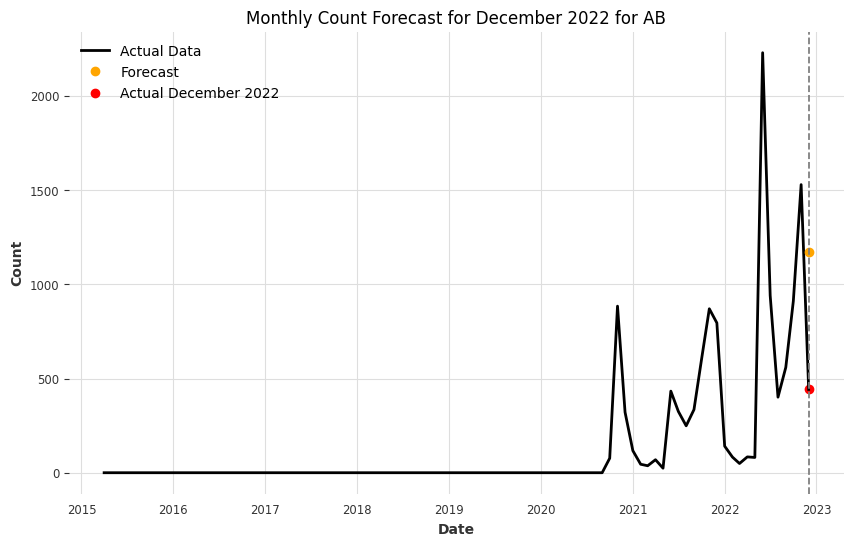

In [22]:
plt.figure(figsize=(10, 6))
series.plot(label='Actual Data')
forecast.plot(label='Forecast', color='orange')
plt.axvline(x=actual.time_index[0], color='gray', linestyle='--')  # Mark the forecast point
plt.scatter(actual.time_index, actual.values(), color='red', label='Actual December 2022')
plt.title("Monthly Count Forecast for December 2022 for AB")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

Step 1: Data Preparation

In [23]:
import pandas as pd
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'practise_data_with_ABN_till_dec.csv'
data = pd.read_csv(file_path)

# Function to prepare the data for a specific material
def prepare_data(df, material):
    df_material = df[df['MaterialNumber'] == material].drop('MaterialNumber', axis=1).T
    df_material.columns = ['Sales']
    df_material.index = pd.to_datetime(df_material.index, format='%d-%m-%Y')
    return df_material

materials = data['MaterialNumber'].unique()

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to train ARIMA model and forecast
def forecast_sales_arima(df, material, order=(5,1,0)):
    df_material = prepare_data(df, material)
    train = df_material[:-1]  # Up to November 2022
    test = df_material[-1:]  # December 2022
    
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    
    actual = test.values
    predicted = forecast.values
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    return actual[0], predicted[0], rmse

# Evaluate for all materials
results = []

for material in materials:
    actual, predicted, rmse = forecast_sales_arima(data, material)
    results.append((material, actual, predicted, rmse))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['MaterialNumber', 'Actual', 'Predicted', 'RMSE'])

results_df


,MaterialNumber,Actual,Predicted,RMSE
0,AB,[442],1428.452269,986.452269
1,ABC,[648],1449.959420,801.959420
2,ABCD,[836],2188.118058,1352.118058
3,ABCDE,[200],554.022799,354.022799
4,ABCDEF,[101],352.781490,251.781490
5,ABCDEFG,[104],278.412666,174.412666
6,ABCDEFGH,[163],913.179066,750.179066
7,ABCDEFGHI,[148],376.685820,228.685820
8,ABCDEFGHIJ,[257],477.363790,220.363790
9,ABCDEFGHIJK,[289],881.752786,592.752786


In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Function to train Exponential Smoothing model and forecast
def forecast_sales_ets(df, material, seasonal_periods=12, trend='add', seasonal='add'):
    df_material = prepare_data(df, material)
    train = df_material[:-1]  # Up to November 2022
    test = df_material[-1:]  # December 2022
    
    model = ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    
    actual = test.values
    predicted = forecast.values
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    return actual[0], predicted[0], rmse

# Evaluate ETS for all materials
results_ets = []

for material in materials:
    actual, predicted, rmse = forecast_sales_ets(data, material)
    results_ets.append((material, actual, predicted, rmse))

# Convert results to DataFrame for better visualization
results_ets_df = pd.DataFrame(results_ets, columns=['MaterialNumber', 'Actual', 'Predicted', 'RMSE'])
results_ets_df


,MaterialNumber,Actual,Predicted,RMSE
0,AB,[442],1169.616792,727.616792
1,ABC,[648],1218.449965,570.449965
2,ABCD,[836],1451.783376,615.783376
3,ABCDE,[200],472.518355,272.518355
4,ABCDEF,[101],165.298403,64.298403
5,ABCDEFG,[104],33.739512,70.260488
6,ABCDEFGH,[163],579.327387,416.327387
7,ABCDEFGHI,[148],469.242512,321.242512
8,ABCDEFGHIJ,[257],526.952622,269.952622
9,ABCDEFGHIJK,[289],503.731396,214.731396


In [26]:
# Function to tune ARIMA parameters and forecast
def forecast_sales_arima_tuned(df, material):
    df_material = prepare_data(df, material)
    train = df_material[:-1]  # Up to November 2022
    test = df_material[-1:]  # December 2022
    
    best_rmse = float('inf')
    best_order = None
    best_forecast = None
    
    # Grid search for ARIMA parameters
    for p in range(0, 3):
        for d in range(0, 3):
            for q in range(0, 3):
                try:
                    model = ARIMA(train, order=(p, d, q))
                    model_fit = model.fit()
                    forecast = model_fit.forecast(steps=1)
                    mse = mean_squared_error(test.values, forecast.values)
                    rmse = np.sqrt(mse)
                    
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_order = (p, d, q)
                        best_forecast = forecast.values
                except:
                    continue
    
    actual = test.values
    return actual[0], best_forecast[0], best_rmse, best_order

# Evaluate tuned ARIMA for all materials
results_arima_tuned = []

for material in materials:
    actual, predicted, rmse, order = forecast_sales_arima_tuned(data, material)
    results_arima_tuned.append((material, actual, predicted, rmse, order))

# Convert results to DataFrame for better visualization
results_arima_tuned_df = pd.DataFrame(results_arima_tuned, columns=['MaterialNumber', 'Actual', 'Predicted', 'RMSE', 'Order'])

results_arima_tuned_df


,MaterialNumber,Actual,Predicted,RMSE,Order
0,AB,[442],663.932534,221.932534,"(0, 0, 1)"
1,ABC,[648],661.429614,13.429614,"(0, 0, 1)"
2,ABCD,[836],876.281857,40.281857,"(0, 0, 2)"
3,ABCDE,[200],202.543506,2.543506,"(0, 0, 0)"
4,ABCDEF,[101],180.467380,79.467380,"(0, 0, 0)"
5,ABCDEFG,[104],187.049198,83.049198,"(0, 0, 1)"
6,ABCDEFGH,[163],213.139738,50.139738,"(0, 0, 1)"
7,ABCDEFGHI,[148],128.926142,19.073858,"(0, 0, 1)"
8,ABCDEFGHIJ,[257],217.080489,39.919511,"(0, 0, 1)"
9,ABCDEFGHIJK,[289],284.041165,4.958835,"(0, 0, 0)"


In [27]:
# Combine results for comparison
comparison_df = results_df.merge(results_ets_df, on='MaterialNumber', suffixes=('_ARIMA', '_ETS'))
comparison_df = comparison_df.merge(results_arima_tuned_df, on='MaterialNumber', suffixes=('', '_Tuned_ARIMA'))

# Visualize comparison
# print(comparison_df[['MaterialNumber', 'Actual', 'Predicted_ARIMA', 'RMSE_ARIMA', 'Predicted_ETS', 'RMSE_ETS', 'Predicted', 'RMSE', 'Order']])
comparison_df

,MaterialNumber,Actual_ARIMA,Predicted_ARIMA,RMSE_ARIMA,Actual_ETS,Predicted_ETS,RMSE_ETS,Actual,Predicted,RMSE,Order
0,AB,[442],1428.452269,986.452269,[442],1169.616792,727.616792,[442],663.932534,221.932534,"(0, 0, 1)"
1,ABC,[648],1449.959420,801.959420,[648],1218.449965,570.449965,[648],661.429614,13.429614,"(0, 0, 1)"
2,ABCD,[836],2188.118058,1352.118058,[836],1451.783376,615.783376,[836],876.281857,40.281857,"(0, 0, 2)"
3,ABCDE,[200],554.022799,354.022799,[200],472.518355,272.518355,[200],202.543506,2.543506,"(0, 0, 0)"
4,ABCDEF,[101],352.781490,251.781490,[101],165.298403,64.298403,[101],180.467380,79.467380,"(0, 0, 0)"
5,ABCDEFG,[104],278.412666,174.412666,[104],33.739512,70.260488,[104],187.049198,83.049198,"(0, 0, 1)"
6,ABCDEFGH,[163],913.179066,750.179066,[163],579.327387,416.327387,[163],213.139738,50.139738,"(0, 0, 1)"
7,ABCDEFGHI,[148],376.685820,228.685820,[148],469.242512,321.242512,[148],128.926142,19.073858,"(0, 0, 1)"
8,ABCDEFGHIJ,[257],477.363790,220.363790,[257],526.952622,269.952622,[257],217.080489,39.919511,"(0, 0, 1)"
9,ABCDEFGHIJK,[289],881.752786,592.752786,[289],503.731396,214.731396,[289],284.041165,4.958835,"(0, 0, 0)"


In [28]:
from prophet import Prophet

def forecast_sales_prophet(df, material):
    df_material = prepare_data(df, material).reset_index()
    df_material.columns = ['ds', 'y']
    
    # Initialize and fit the model
    model = Prophet()
    model.fit(df_material)
    
    # Create a DataFrame for future dates
    future = model.make_future_dataframe(periods=1, freq='M')
    
    # Make predictions
    forecast = model.predict(future)
    actual = df_material['y'].values[-1]
    predicted = forecast['yhat'].values[-1]
    
    return actual, predicted

# Evaluate Prophet for all materials
results_prophet = []

for material in materials:
    actual, predicted = forecast_sales_prophet(data, material)
    results_prophet.append((material, actual, predicted))

# Convert results to DataFrame for better visualization
results_prophet_df = pd.DataFrame(results_prophet, columns=['MaterialNumber', 'Actual', 'Predicted'])

results_prophet_df

09:33:24 - cmdstanpy - INFO - Chain [1] start processing
09:33:24 - cmdstanpy - INFO - Chain [1] done processing
09:33:24 - cmdstanpy - INFO - Chain [1] start processing
09:33:25 - cmdstanpy - INFO - Chain [1] done processing
09:33:25 - cmdstanpy - INFO - Chain [1] start processing
09:33:25 - cmdstanpy - INFO - Chain [1] done processing
09:33:25 - cmdstanpy - INFO - Chain [1] start processing
09:33:25 - cmdstanpy - INFO - Chain [1] done processing
09:33:25 - cmdstanpy - INFO - Chain [1] start processing
09:33:25 - cmdstanpy - INFO - Chain [1] done processing
09:33:25 - cmdstanpy - INFO - Chain [1] start processing
09:33:26 - cmdstanpy - INFO - Chain [1] done processing
09:33:26 - cmdstanpy - INFO - Chain [1] start processing
09:33:26 - cmdstanpy - INFO - Chain [1] done processing
09:33:26 - cmdstanpy - INFO - Chain [1] start processing
09:33:26 - cmdstanpy - INFO - Chain [1] done processing
09:33:27 - cmdstanpy - INFO - Chain [1] start processing
09:33:27 - cmdstanpy - INFO - Chain [1]

,MaterialNumber,Actual,Predicted
0,AB,442,7152.196689
1,ABC,648,2886.431994
2,ABCD,836,13571.796955
3,ABCDE,200,16736.789594
4,ABCDEF,101,7599.455628
5,ABCDEFG,104,13724.886135
6,ABCDEFGH,163,9632.852500
7,ABCDEFGHI,148,1944.147123
8,ABCDEFGHIJ,257,2230.106539
9,ABCDEFGHIJK,289,18961.328487


In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

def forecast_sales_lstm(df, material):
    df_material = prepare_data(df, material).values
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_material_scaled = scaler.fit_transform(df_material)
    
    # Split into training and test sets
    train_size = len(df_material_scaled) - 1
    train, test = df_material_scaled[0:train_size], df_material_scaled[train_size:]
    
    # Convert to a format suitable for LSTM
    def create_dataset(dataset):
        X, Y = [], []
        for i in range(len(dataset) - 1):
            X.append(dataset[i, 0])
            Y.append(dataset[i + 1, 0])
        return np.array(X), np.array(Y)
    
    trainX, trainY = create_dataset(train)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, 1))
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Train the model
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    
    # Make predictions
    testX = np.reshape(test, (1, 1, 1))
    predicted = model.predict(testX)
    predicted = scaler.inverse_transform(predicted)
    
    actual = scaler.inverse_transform(test)
    
    return actual[0][0], predicted[0][0]

# Evaluate LSTM for all materials
results_lstm = []

for material in materials:
    actual, predicted = forecast_sales_lstm(data, material)
    results_lstm.append((material, actual, predicted))

# Convert results to DataFrame for better visualization
results_lstm_df = pd.DataFrame(results_lstm, columns=['MaterialNumber', 'Actual', 'Predicted'])


2024-06-17 09:33:29.323264: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 09:33:29.431222: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 09:33:29.831231: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 09:33:31.034881: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100
91/91 - 1s - 13ms/step - loss: 0.0244
Epoch 2/100
91/91 - 0s - 1ms/step - loss: 0.0226
Epoch 3/100
91/91 - 0s - 1ms/step - loss: 0.0221
Epoch 4/100
91/91 - 0s - 1ms/step - loss: 0.0216
Epoch 5/100
91/91 - 0s - 1ms/step - loss: 0.0211
Epoch 6/100
91/91 - 0s - 1ms/step - loss: 0.0207
Epoch 7/100
91/91 - 0s - 1ms/step - loss: 0.0203
Epoch 8/100
91/91 - 0s - 1ms/step - loss: 0.0198
Epoch 9/100
91/91 - 0s - 1ms/step - loss: 0.0194
Epoch 10/100
91/91 - 0s - 988us/step - loss: 0.0190
Epoch 11/100
91/91 - 0s - 1ms/step - loss: 0.0186
Epoch 12/100
91/91 - 0s - 1ms/step - loss: 0.0183
Epoch 13/100
91/91 - 0s - 1ms/step - loss: 0.0180
Epoch 14/100
91/91 - 0s - 1ms/step - loss: 0.0177
Epoch 15/100
91/91 - 0s - 1ms/step - loss: 0.0176
Epoch 16/100
91/91 - 0s - 1ms/step - loss: 0.0174
Epoch 17/100
91/91 - 0s - 1ms/step - loss: 0.0173
Epoch 18/100
91/91 - 0s - 1ms/step - loss: 0.0172
Epoch 19/100
91/91 - 0s - 953us/step - loss: 0.0170
Epoch 20/100
91/91 - 0s - 1ms/step - loss: 0.0169
Epoc

In [30]:
results_lstm_df

,MaterialNumber,Actual,Predicted
0,AB,442.0,404.800415
1,ABC,648.0,611.351807
2,ABCD,836.0,708.418030
3,ABCDE,200.0,223.645676
4,ABCDEF,101.0,131.744537
5,ABCDEFG,104.0,166.093399
6,ABCDEFGH,163.0,155.795975
7,ABCDEFGHI,148.0,156.679947
8,ABCDEFGHIJ,257.0,254.165543
9,ABCDEFGHIJK,289.0,334.500244


In [31]:
from pmdarima import auto_arima

def forecast_sales_autoarima(df, material):
    df_material = prepare_data(df, material)
    train = df_material[:-1]
    test = df_material[-1:]
    
    model = auto_arima(train, seasonal=False, stepwise=True)
    forecast = model.predict(n_periods=1)
    
    actual = test.values
    predicted = forecast.values
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    return actual, predicted, rmse

# Evaluate AutoARIMA for all materials
results_autoarima = []

for material in materials:
    actual, predicted, rmse = forecast_sales_autoarima(data, material)
    results_autoarima.append((material, actual, predicted, rmse))

# Convert results to DataFrame for better visualization
results_autoarima_df = pd.DataFrame(results_autoarima, columns=['MaterialNumber', 'Actual', 'Predicted', 'RMSE'])

results_autoarima_df

,MaterialNumber,Actual,Predicted,RMSE
0,AB,[[442]],[1017.5070888454519],575.507089
1,ABC,[[648]],[1265.627243800707],617.627244
2,ABCD,[[836]],[1570.057883232585],734.057883
3,ABCDE,[[200]],[521.0],321.000000
4,ABCDEF,[[101]],[274.39835271008633],173.398353
5,ABCDEFG,[[104]],[246.3904485507229],142.390449
6,ABCDEFGH,[[163]],[537.875086182657],374.875086
7,ABCDEFGHI,[[148]],[406.7620411632124],258.762041
8,ABCDEFGHIJ,[[257]],[482.9190552610256],225.919055
9,ABCDEFGHIJK,[[289]],[594.2514033646044],305.251403


In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:

# Function to train SARIMA model and forecast
def forecast_sales_sarima(df, material, order=(1,1,1), seasonal_order=(1,1,1,12)):
    df_material = prepare_data(df, material)
    train = df_material[:-1]  # Up to November 2022
    test = df_material[-1:]  # December 2022
    
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=1)
    
    actual = test.values
    predicted = forecast.values
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    
    return actual[0], predicted[0], rmse

# Evaluate SARIMA for all materials
results_sarima = []

for material in materials:
    actual, predicted, rmse = forecast_sales_sarima(data, material)
    results_sarima.append((material, actual, predicted, rmse))

# Convert results to DataFrame for better visualization
results_sarima_df = pd.DataFrame(results_sarima, columns=['MaterialNumber', 'Actual', 'Predicted', 'RMSE'])
results_sarima_df

,MaterialNumber,Actual,Predicted,RMSE
0,AB,[442],1258.420342,816.420342
1,ABC,[648],944.693819,296.693819
2,ABCD,[836],1379.265352,543.265352
3,ABCDE,[200],523.565193,323.565193
4,ABCDEF,[101],148.961390,47.961390
5,ABCDEFG,[104],169.405816,65.405816
6,ABCDEFGH,[163],330.512244,167.512244
7,ABCDEFGHI,[148],402.571539,254.571539
8,ABCDEFGHIJ,[257],510.440011,253.440011
9,ABCDEFGHIJK,[289],559.184778,270.184778


In [34]:
import concurrent.futures

def forecast_sales_sarima_tuned_parallel(df, material, params):
    df_material = prepare_data(df, material)
    train = df_material[:-1]
    test = df_material[-1:]
    
    p, d, q, P, D, Q = params
    try:
        model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, 12))
        model_fit = model.fit(disp=False)
        forecast = model_fit.forecast(steps=1)
        mse = mean_squared_error(test.values, forecast.values)
        rmse = np.sqrt(mse)
        return rmse, (p, d, q), (P, D, Q, 12), forecast.values
    except:
        return float('inf'), None, None, None

# Evaluate tuned SARIMA for all materials in parallel
def evaluate_material_parallel(material):
    params = [(p, d, q, P, D, Q) for p in range(0, 2) for d in range(0, 2) for q in range(0, 2) for P in range(0, 2) for D in range(0, 2) for Q in range(0, 2)]
    
    with concurrent.futures.ProcessPoolExecutor() as executor:
        futures = [executor.submit(forecast_sales_sarima_tuned_parallel, data, material, param) for param in params]
        results = [future.result() for future in concurrent.futures.as_completed(futures)]
    
    best_result = min(results, key=lambda x: x[0])
    best_rmse, best_order, best_seasonal_order, best_forecast = best_result
    
    df_material = prepare_data(data, material)
    actual = df_material.values[-1][0]
    
    return material, actual, best_forecast[0], best_rmse, best_order, best_seasonal_order

results_sarima_tuned_parallel = []

for material in materials:
    result = evaluate_material_parallel(material)
    results_sarima_tuned_parallel.append(result)

# Convert results to DataFrame for better visualization
results_sarima_tuned_parallel_df = pd.DataFrame(results_sarima_tuned_parallel, columns=['MaterialNumber', 'Actual', 'Predicted', 'RMSE', 'Order', 'SeasonalOrder'])
results_sarima_tuned_parallel_df


,MaterialNumber,Actual,Predicted,RMSE,Order,SeasonalOrder
0,AB,442,404.277039,37.722961,"(0, 0, 0)","(0, 0, 1, 12)"
1,ABC,648,651.862935,3.862935,"(0, 0, 0)","(1, 1, 0, 12)"
2,ABCD,836,848.923124,12.923124,"(0, 0, 1)","(0, 0, 1, 12)"
3,ABCDE,200,231.000255,31.000255,"(0, 0, 1)","(0, 0, 1, 12)"
4,ABCDEF,101,99.739018,1.260982,"(0, 1, 1)","(1, 1, 1, 12)"
5,ABCDEFG,104,101.120115,2.879885,"(0, 0, 1)","(1, 0, 1, 12)"
6,ABCDEFGH,163,176.467794,13.467794,"(0, 0, 1)","(1, 1, 1, 12)"
7,ABCDEFGHI,148,106.420879,41.579121,"(0, 0, 1)","(1, 0, 0, 12)"
8,ABCDEFGHIJ,257,193.006490,63.993510,"(0, 0, 1)","(0, 1, 0, 12)"
9,ABCDEFGHIJK,289,245.931739,43.068261,"(0, 0, 1)","(0, 0, 0, 12)"


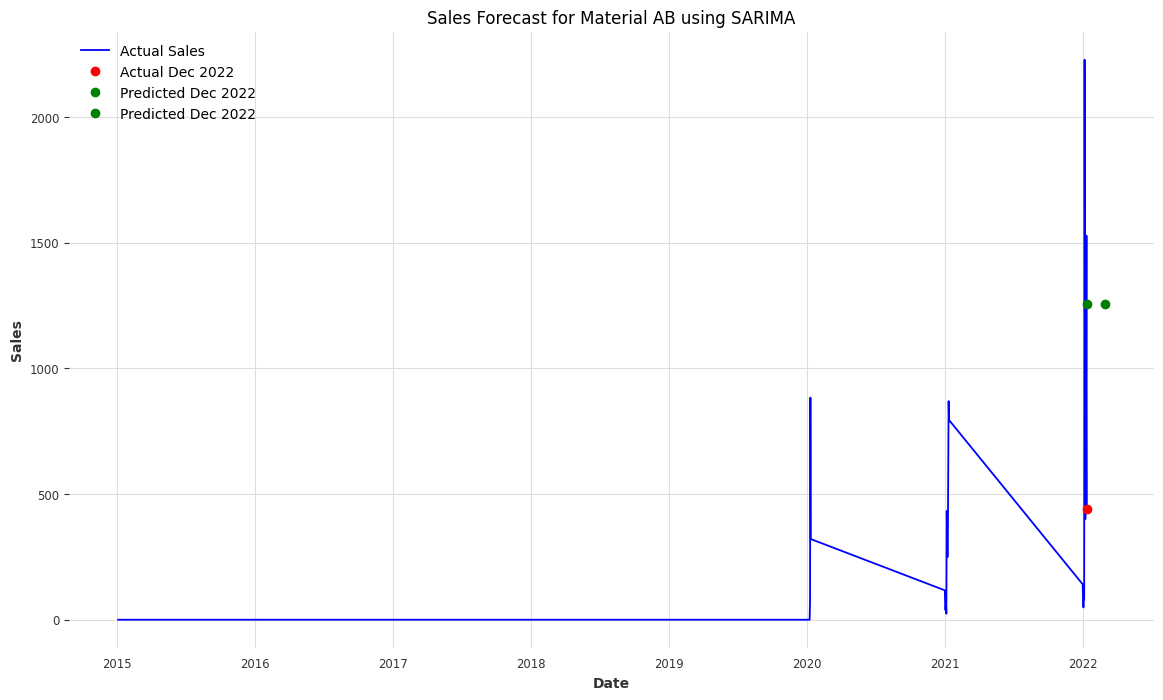

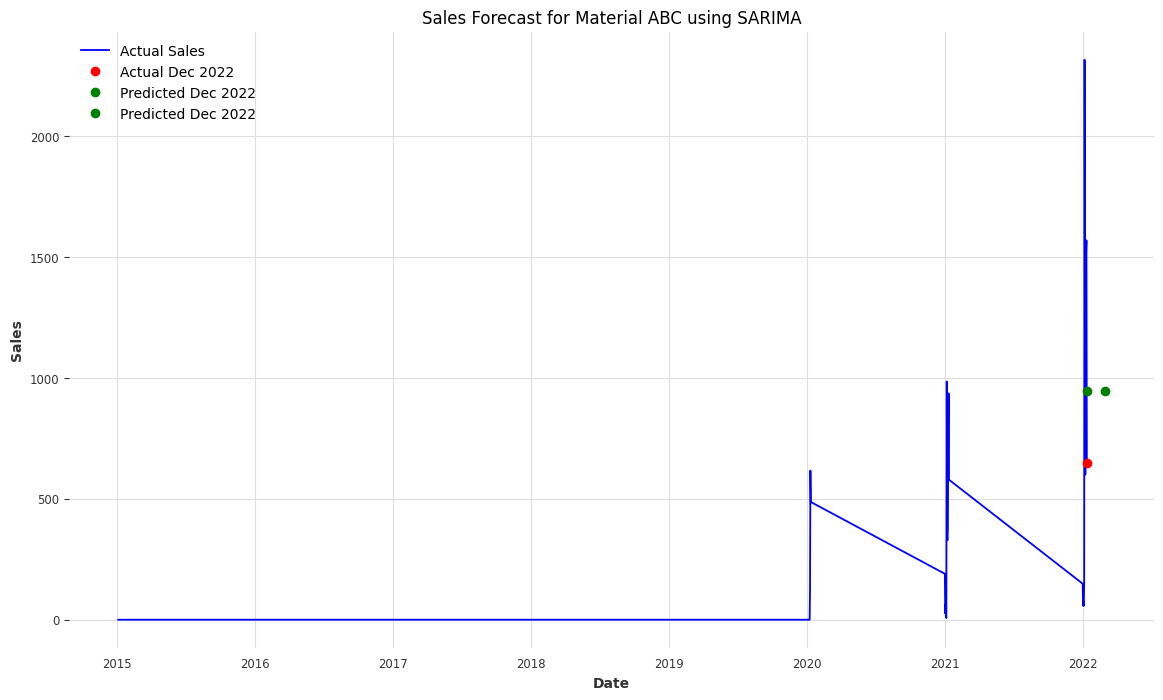

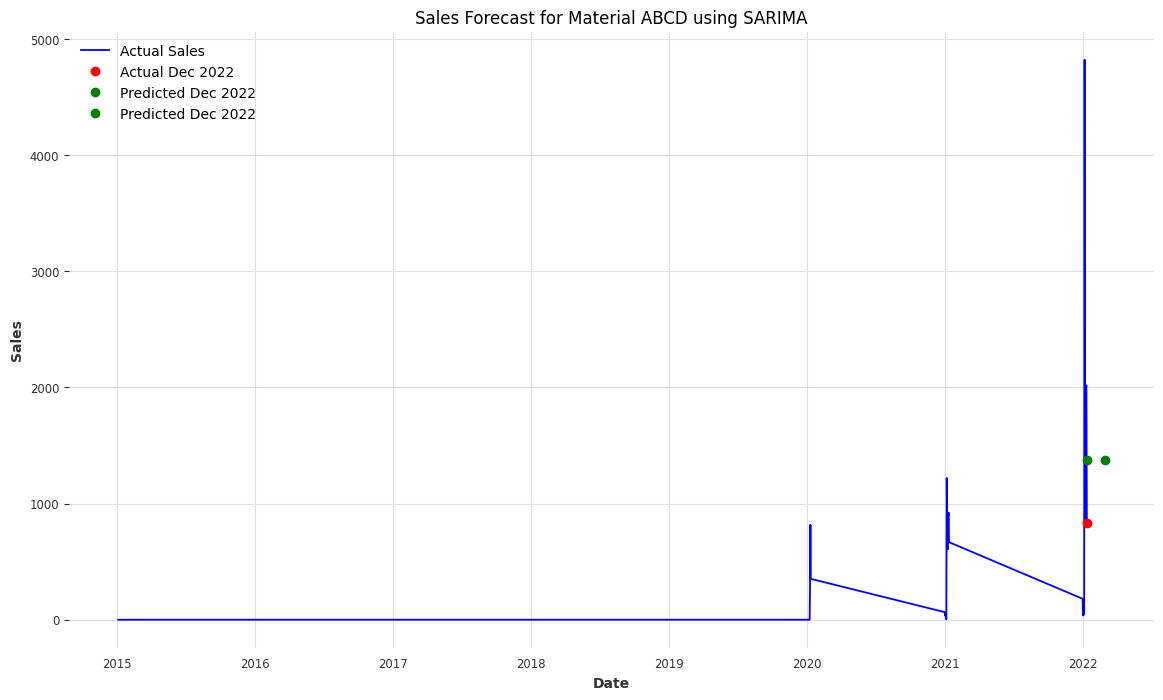

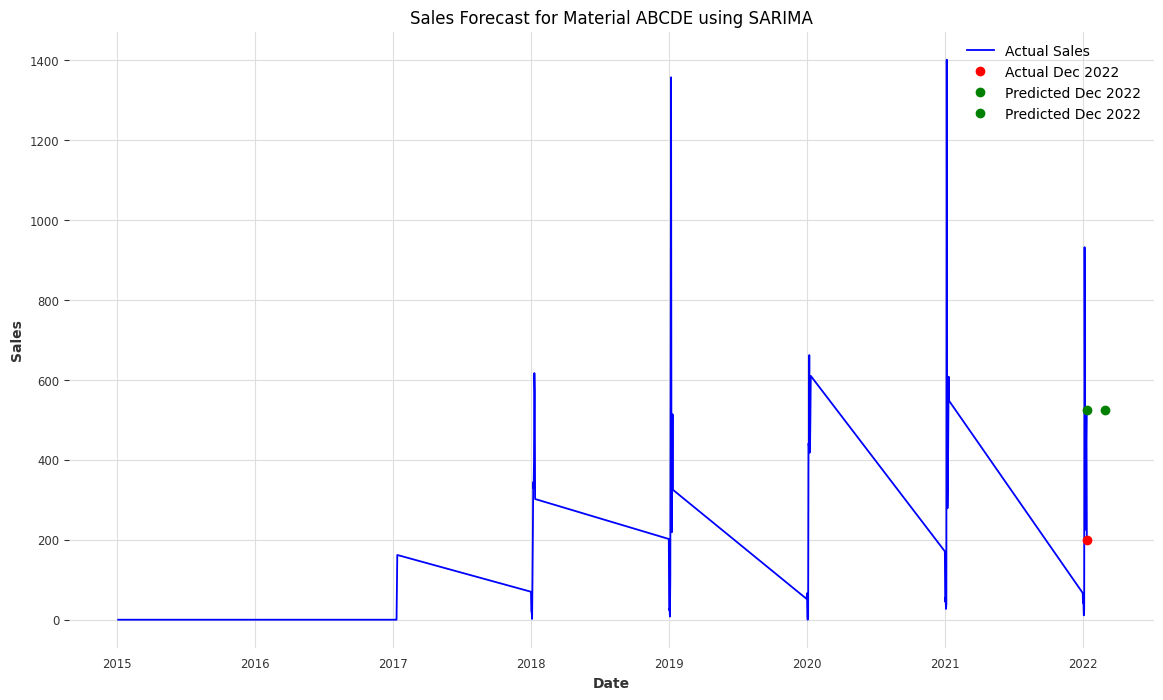

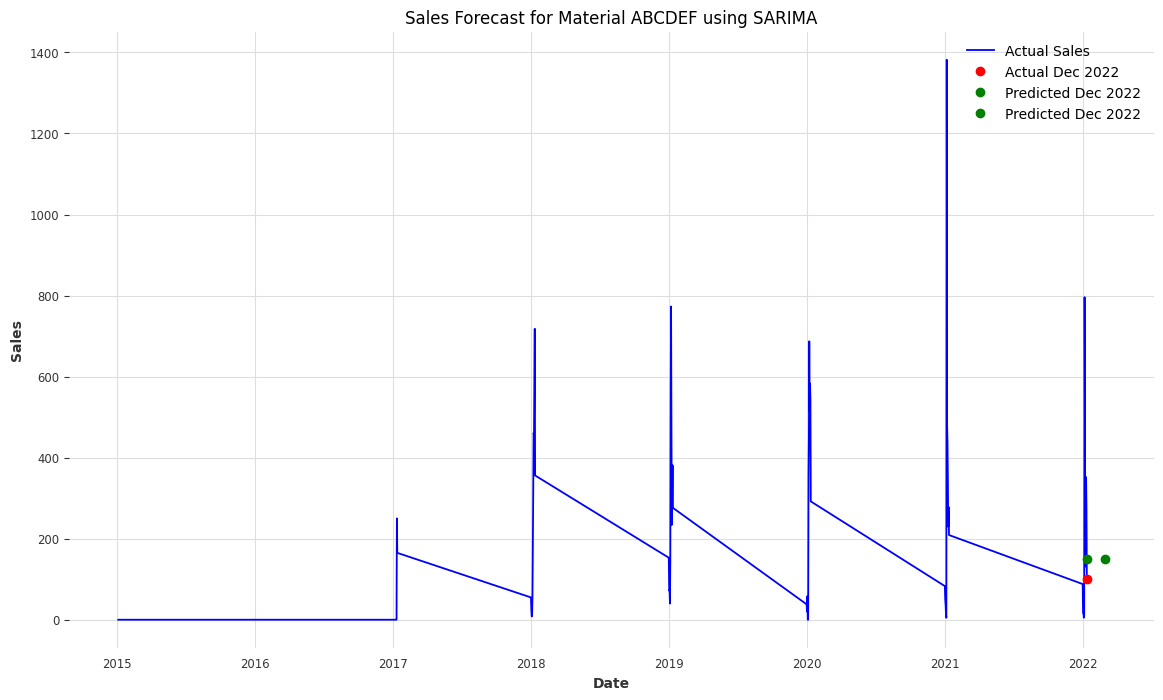

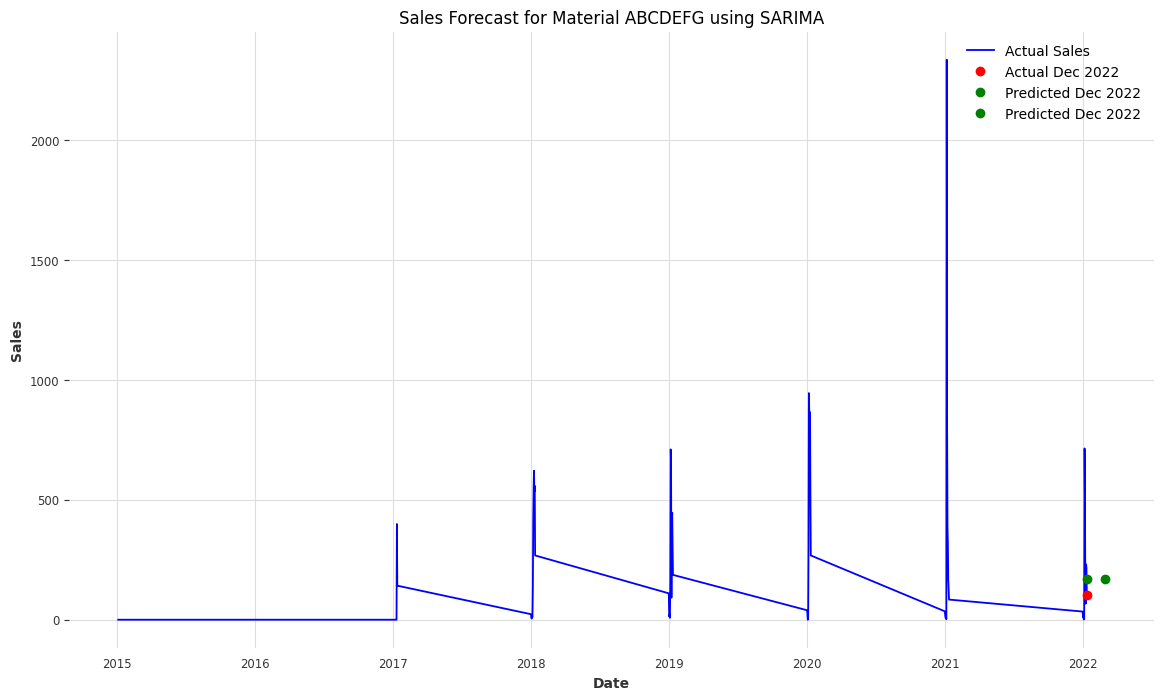

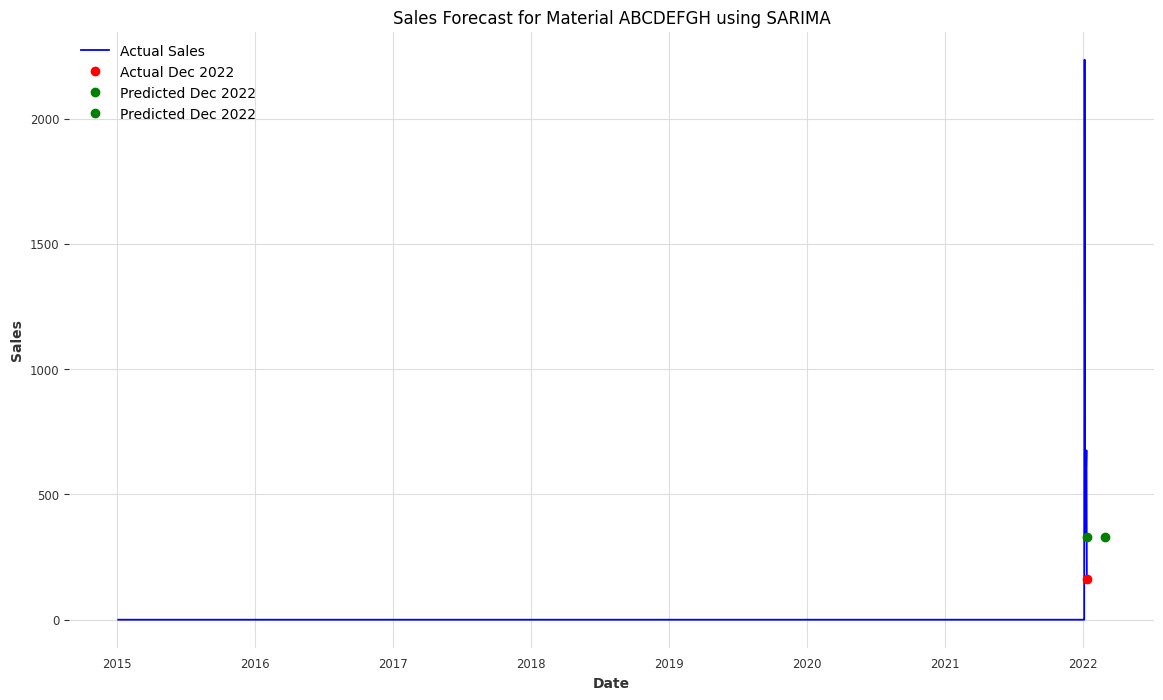

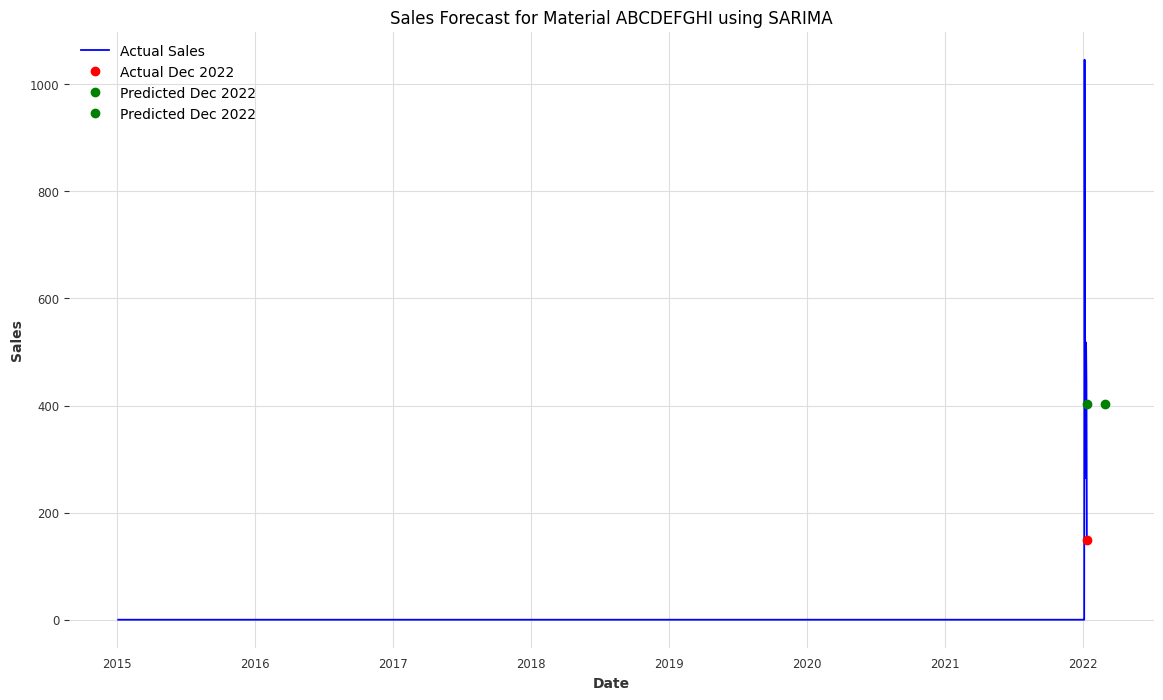

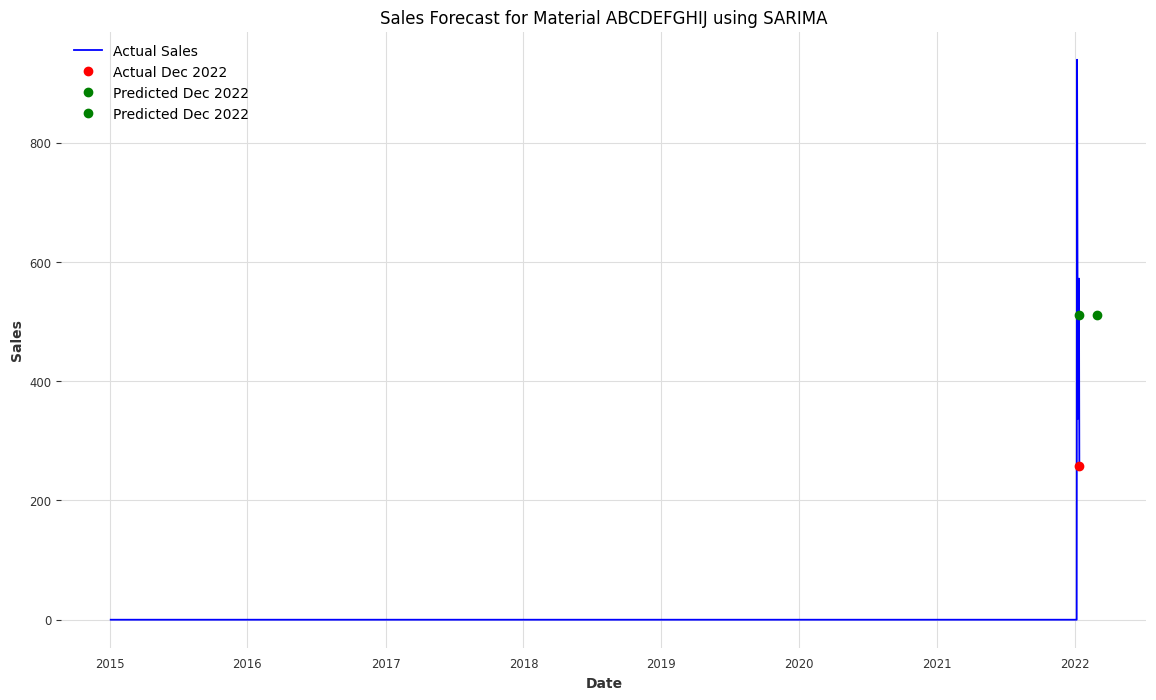

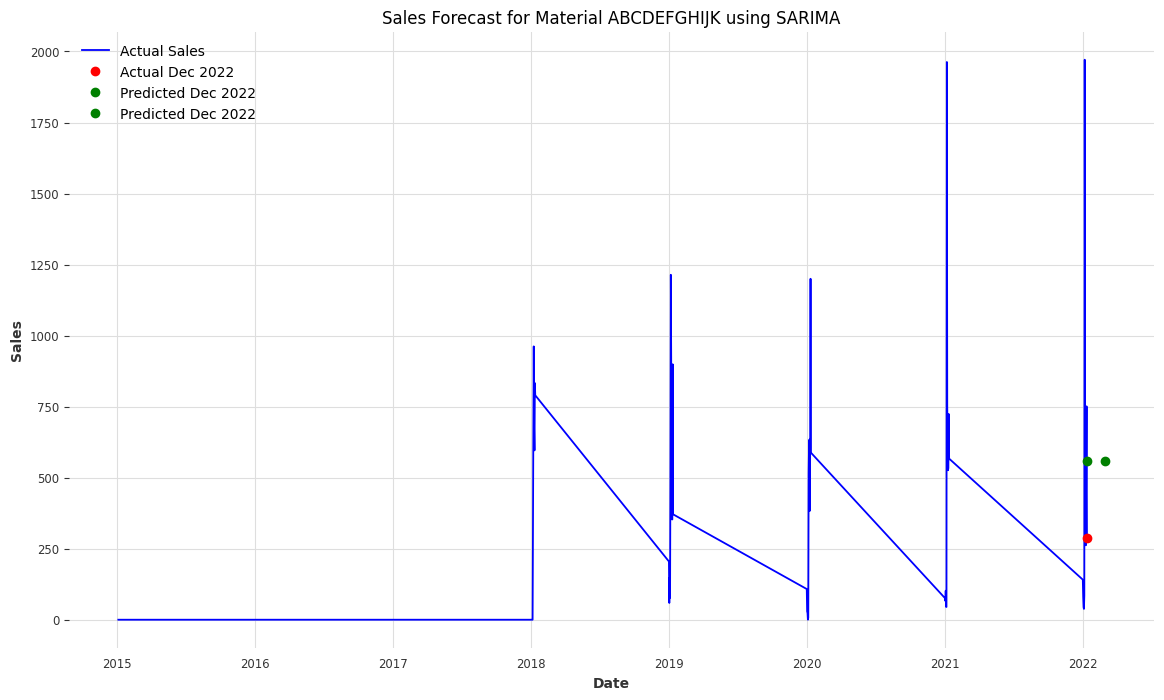

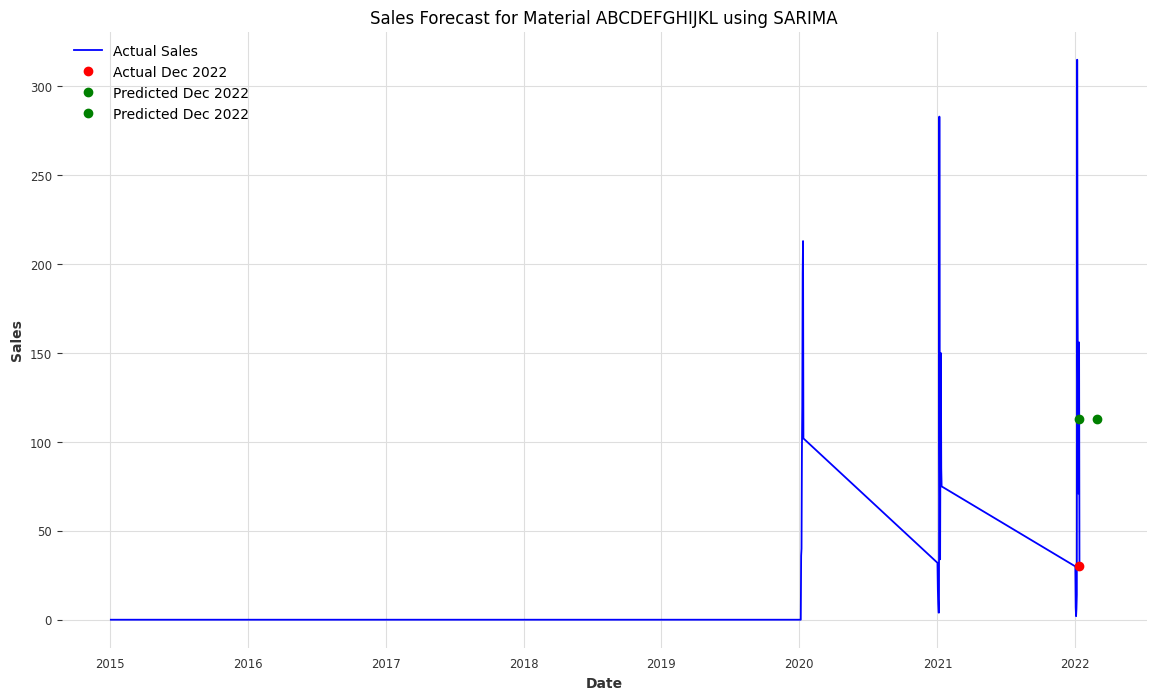

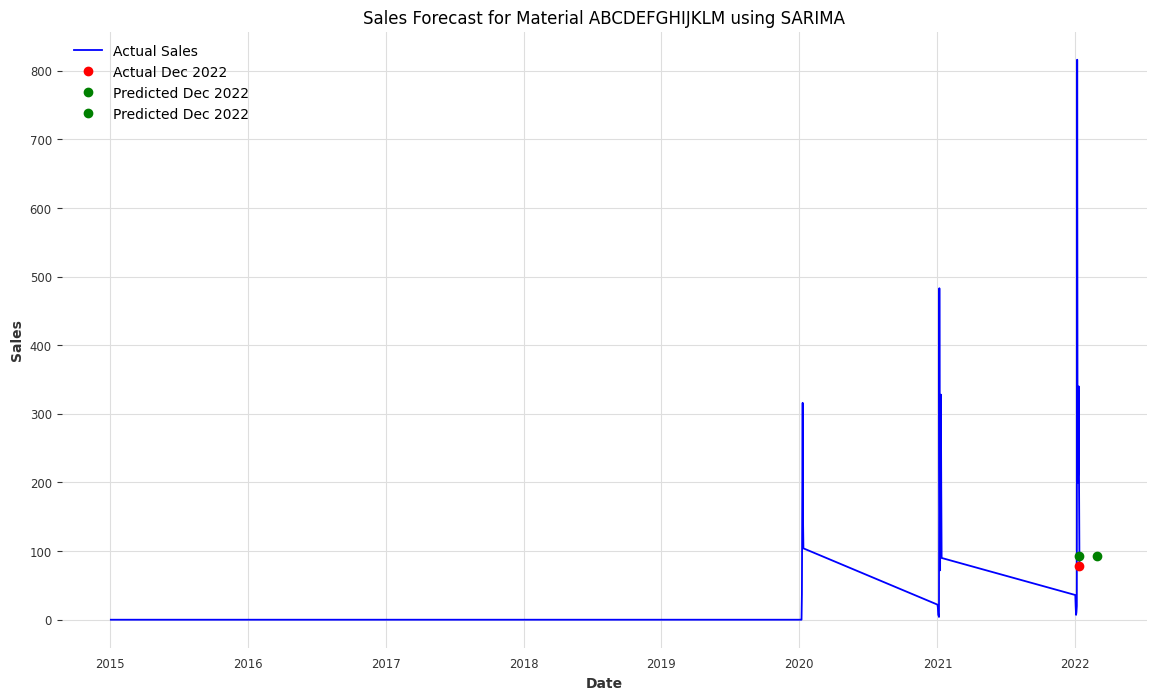

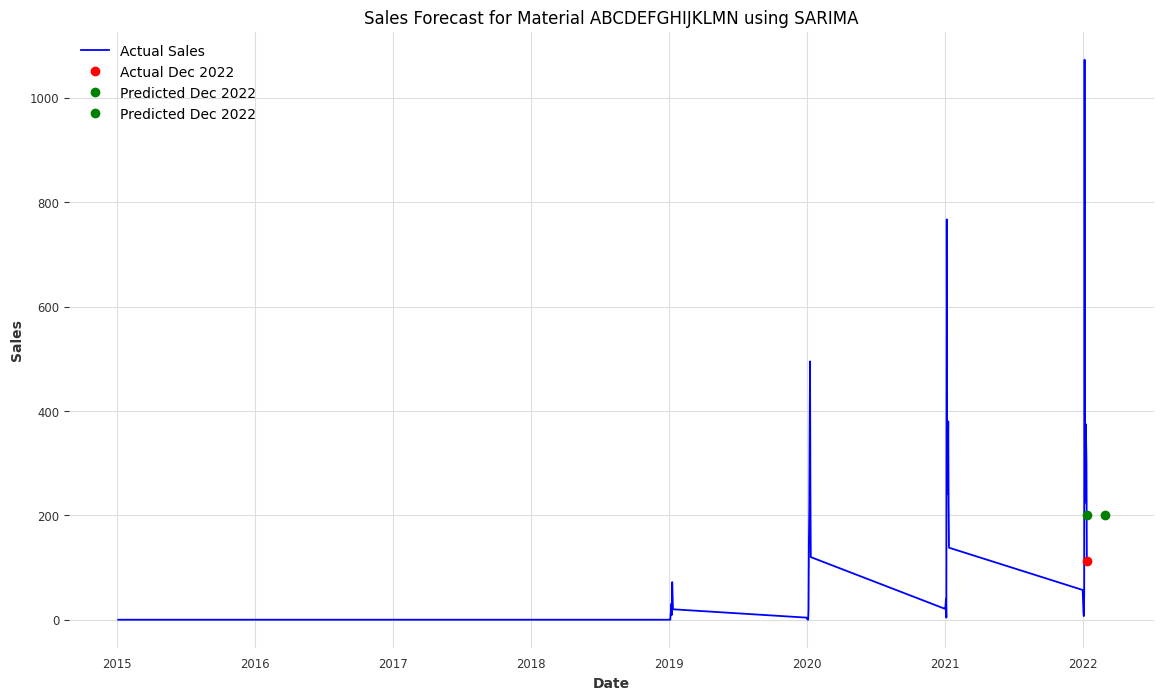

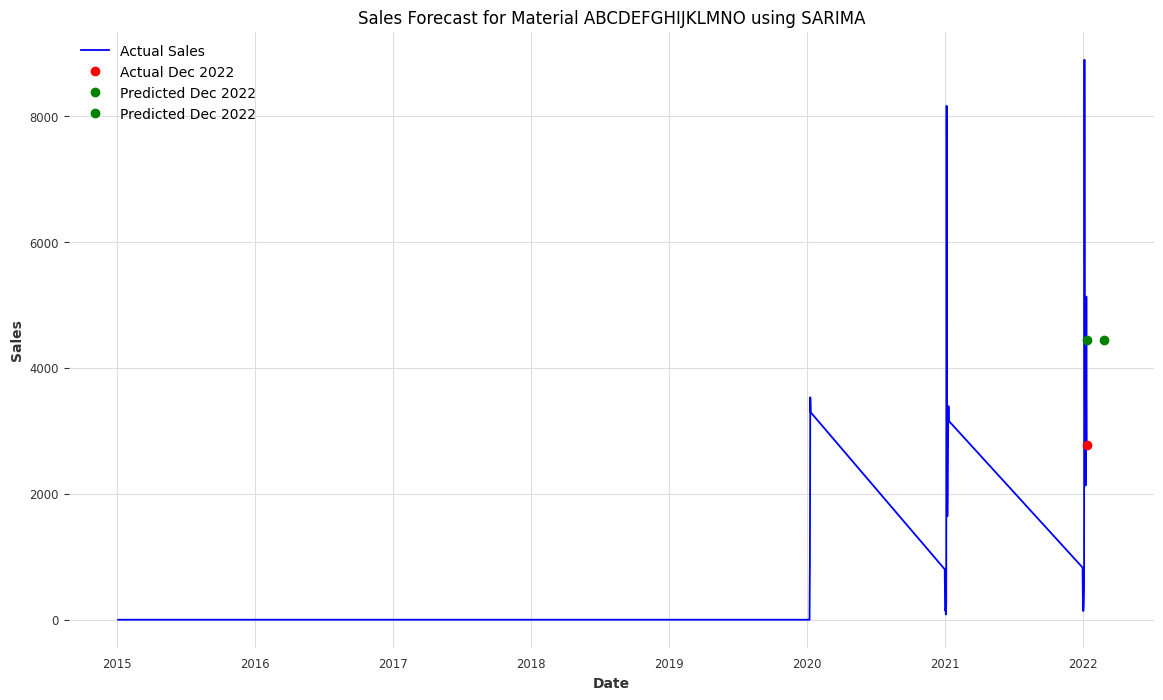

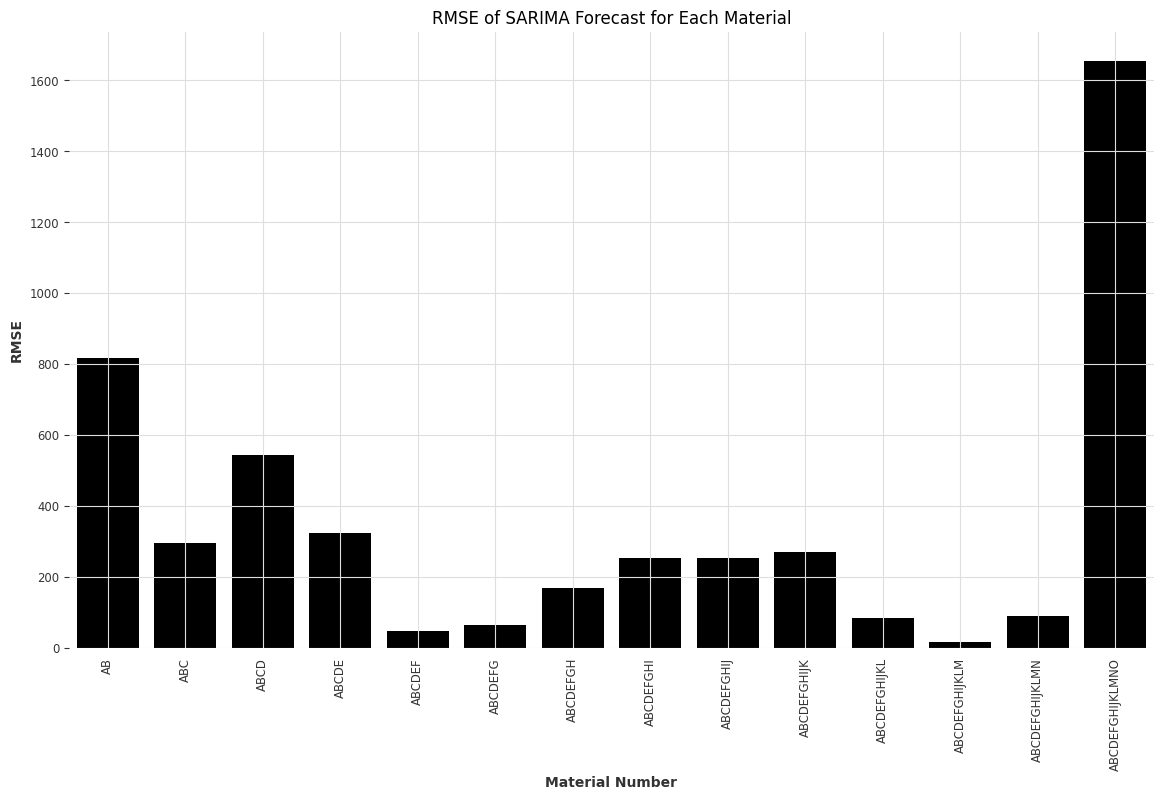

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the results for a specific material
def plot_forecast_sarima(df, material, actual, predicted):
    df_material = prepare_data(df, material)
    
    plt.figure(figsize=(14, 8))
    plt.plot(df_material.index, df_material['Sales'], label='Actual Sales', color='blue')
    plt.plot(df_material.index[-1:], actual, 'ro', label='Actual Dec 2022')
    plt.plot(df_material.index[-1:], predicted, 'go', label='Predicted Dec 2022')
    
    forecast_index = pd.date_range(start=df_material.index[-1], periods=2, freq='M')[1]
    plt.plot(forecast_index, predicted, 'go', label='Predicted Dec 2022')
    
    plt.title(f'Sales Forecast for Material {material} using SARIMA')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting results for all materials
for index, row in results_sarima_df.iterrows():
    material = row['MaterialNumber']
    actual = row['Actual']
    predicted = row['Predicted']
    plot_forecast_sarima(data, material, actual, predicted)

# Plot RMSE for all materials
plt.figure(figsize=(14, 8))
sns.barplot(x='MaterialNumber', y='RMSE', data=results_sarima_df)
plt.title('RMSE of SARIMA Forecast for Each Material')
plt.xlabel('Material Number')
plt.ylabel('RMSE')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


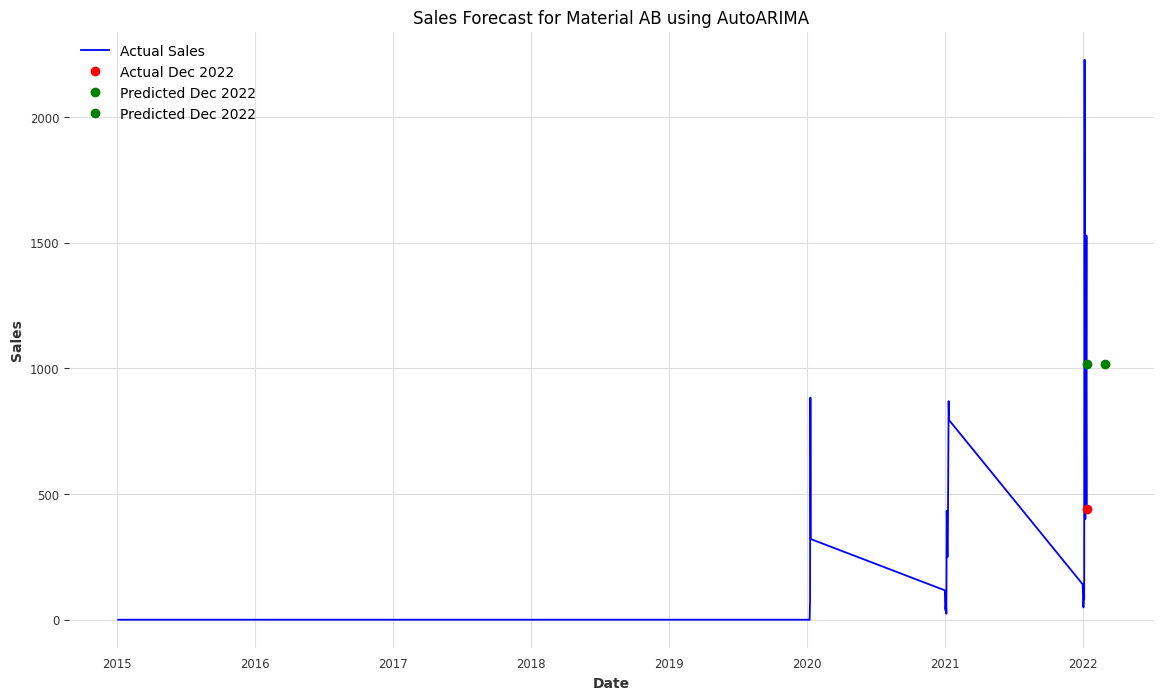

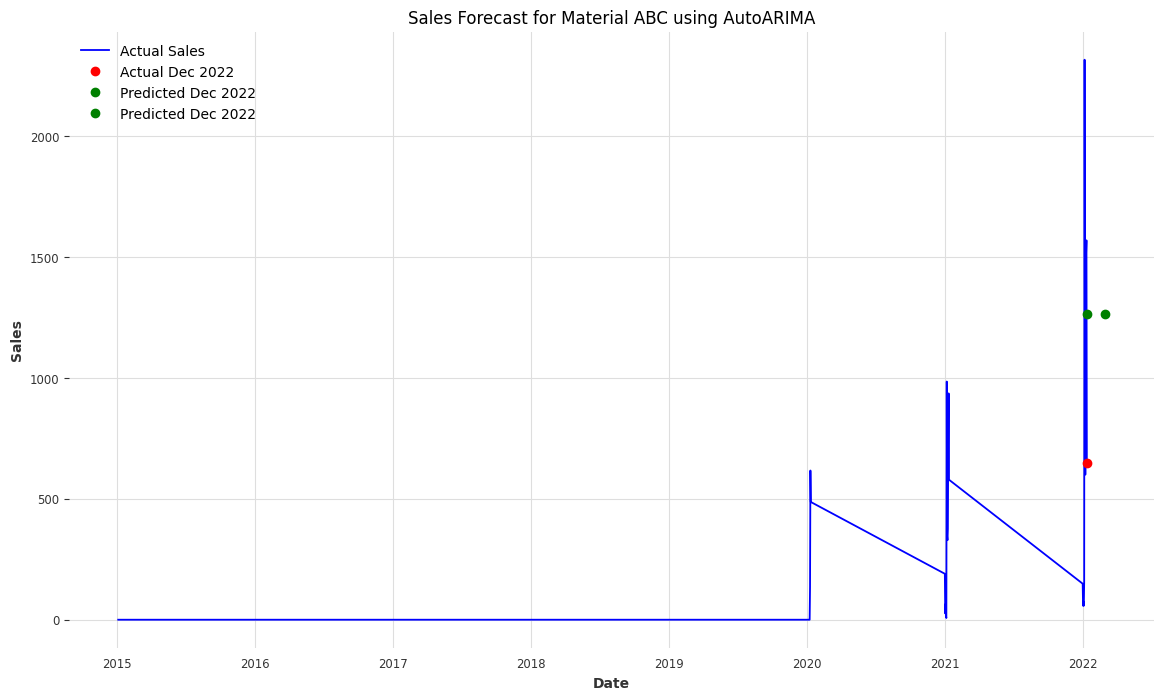

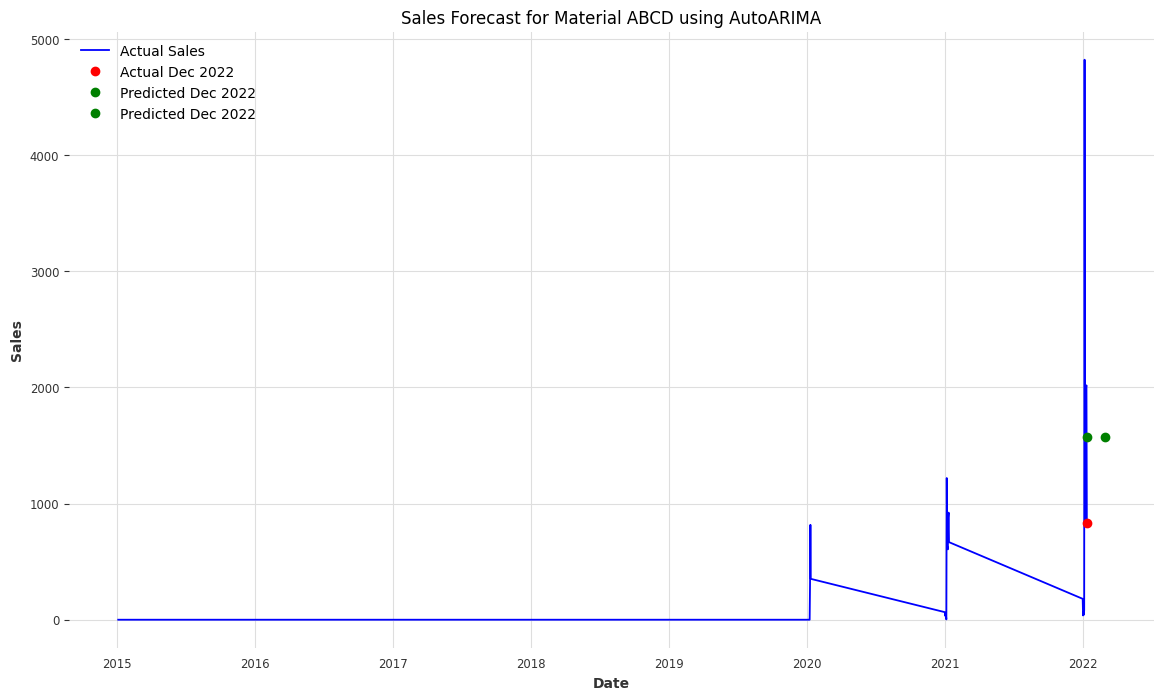

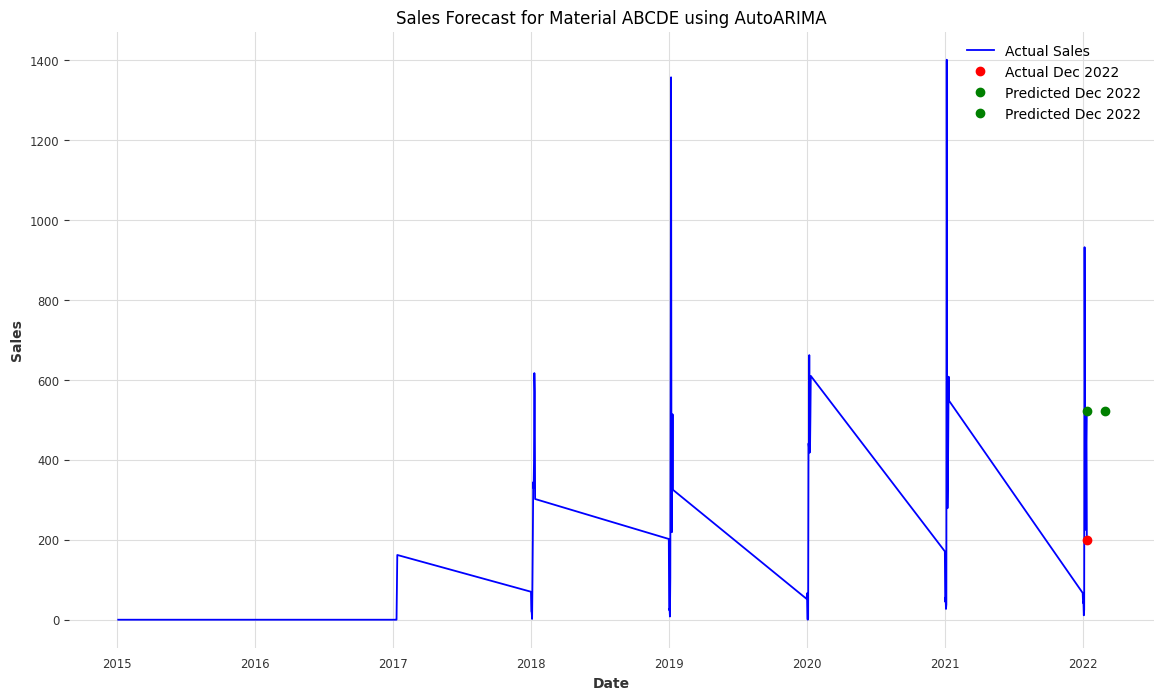

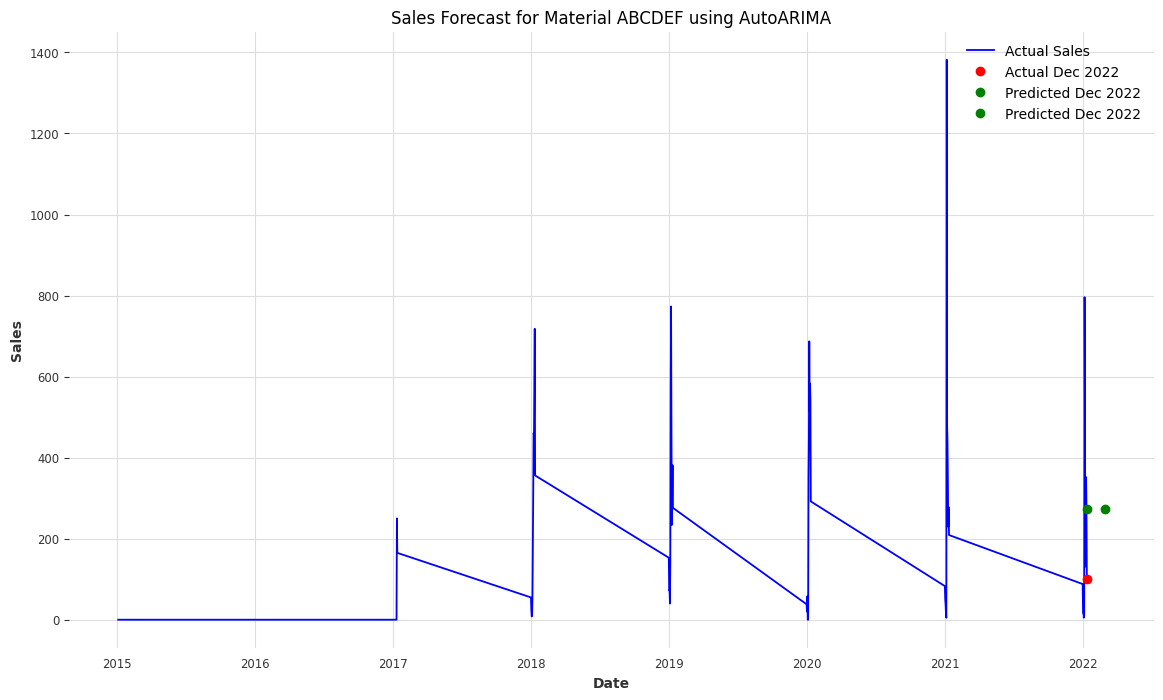

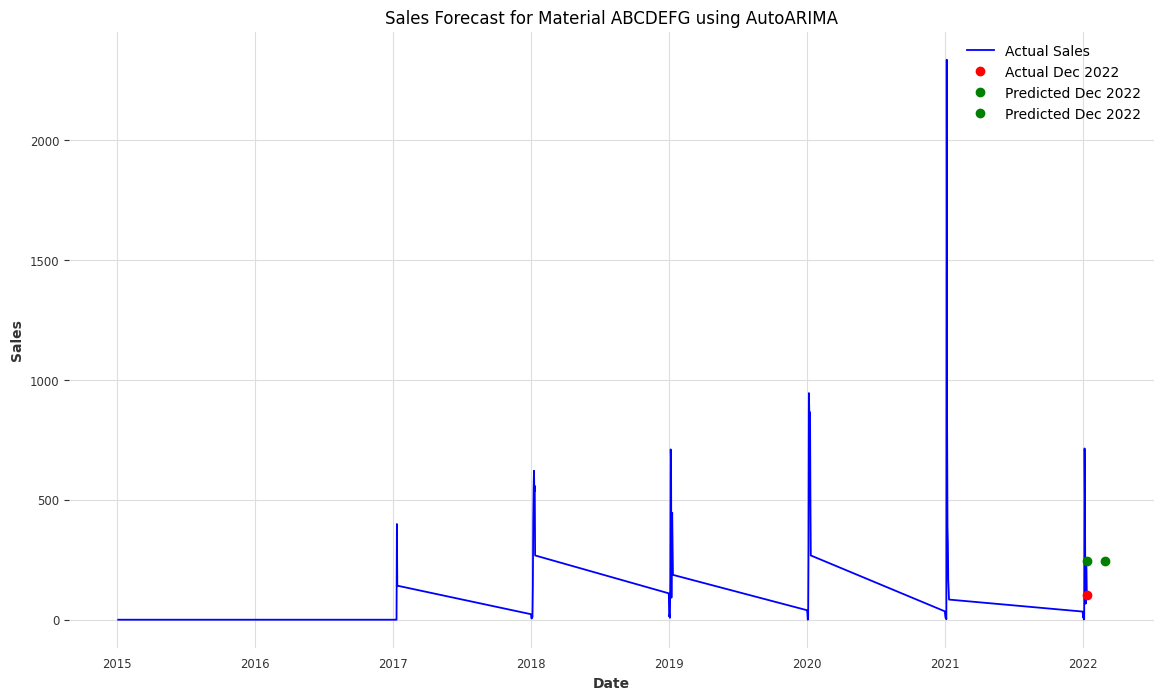

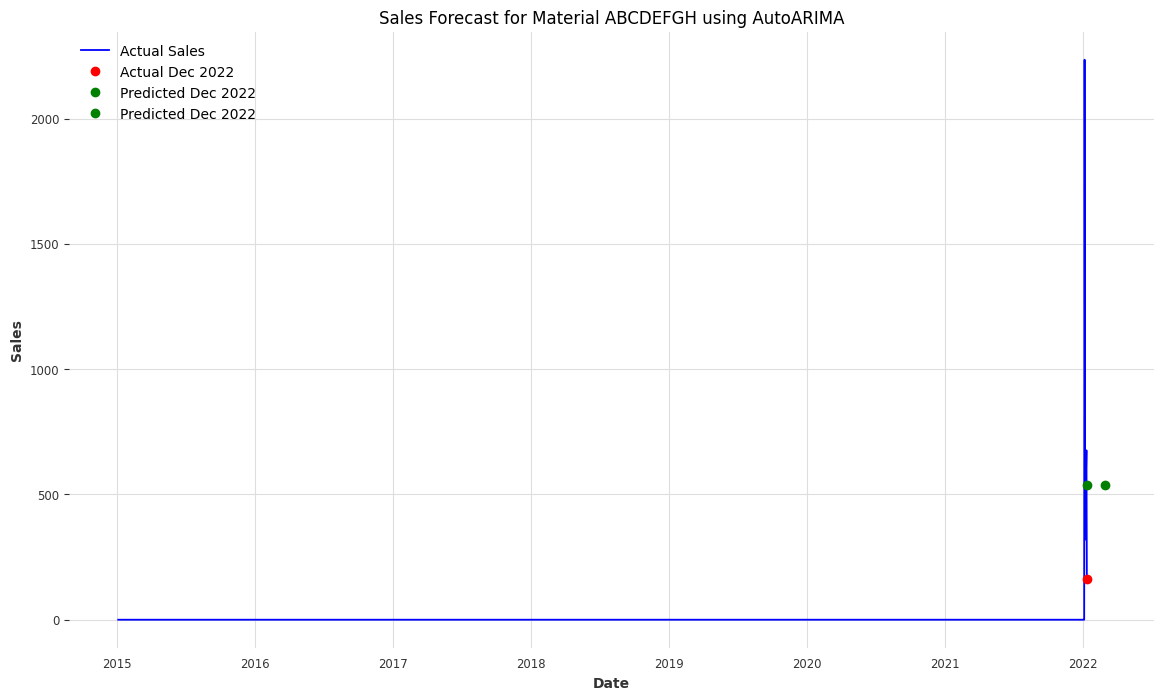

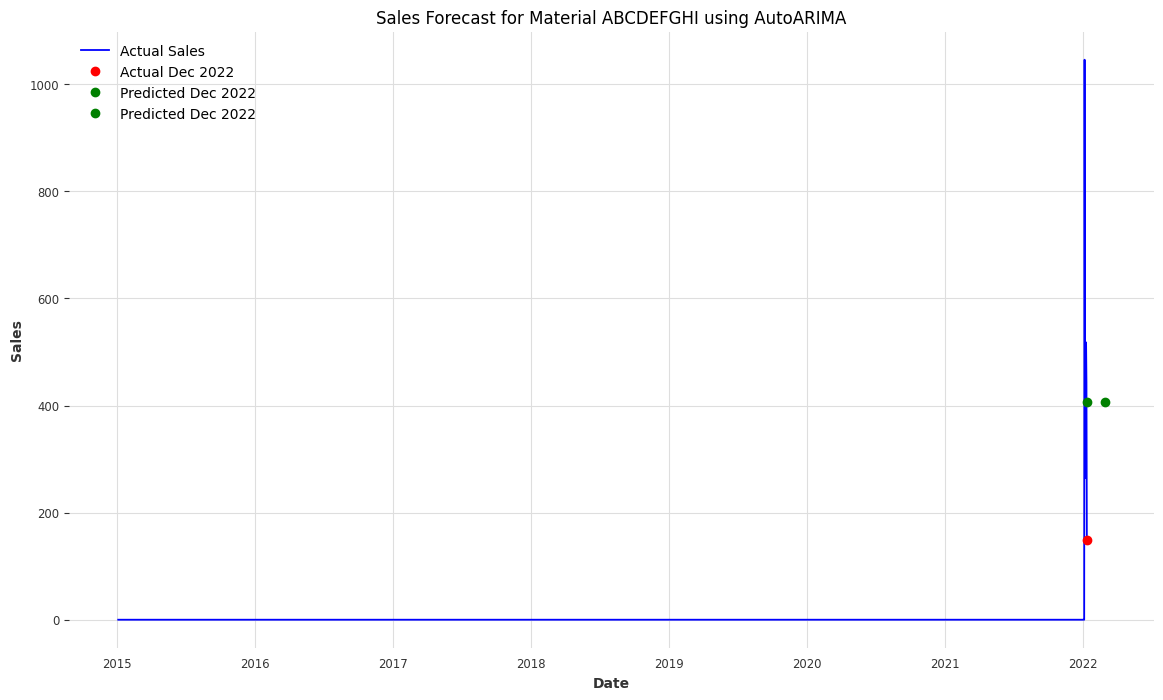

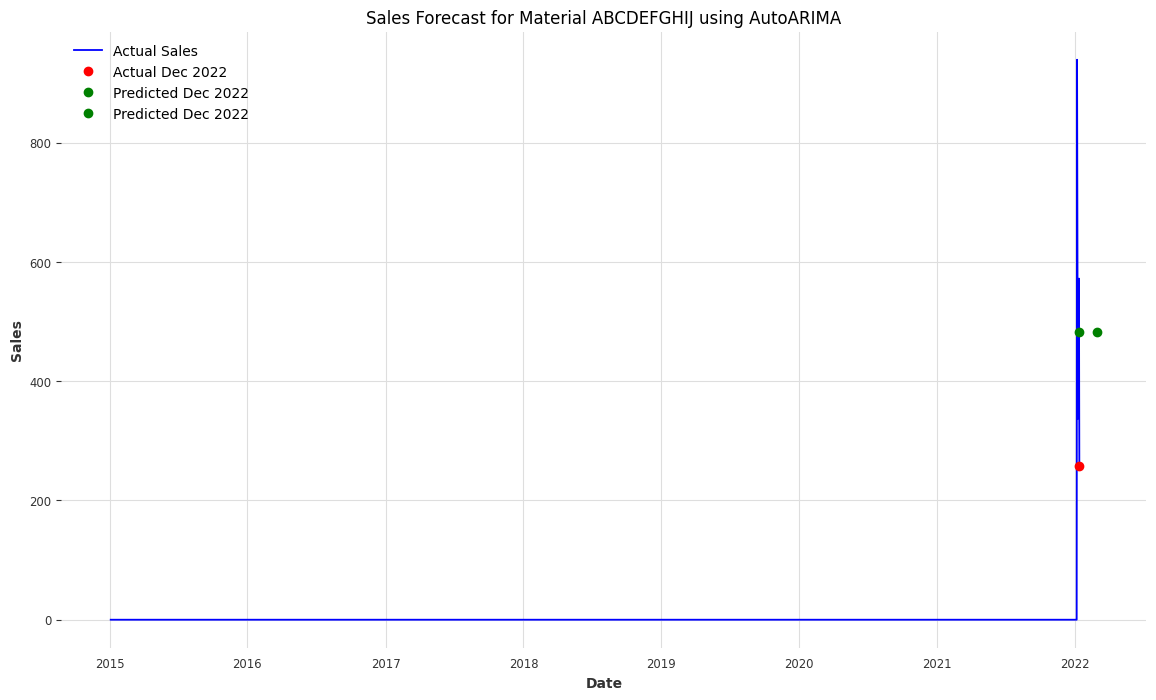

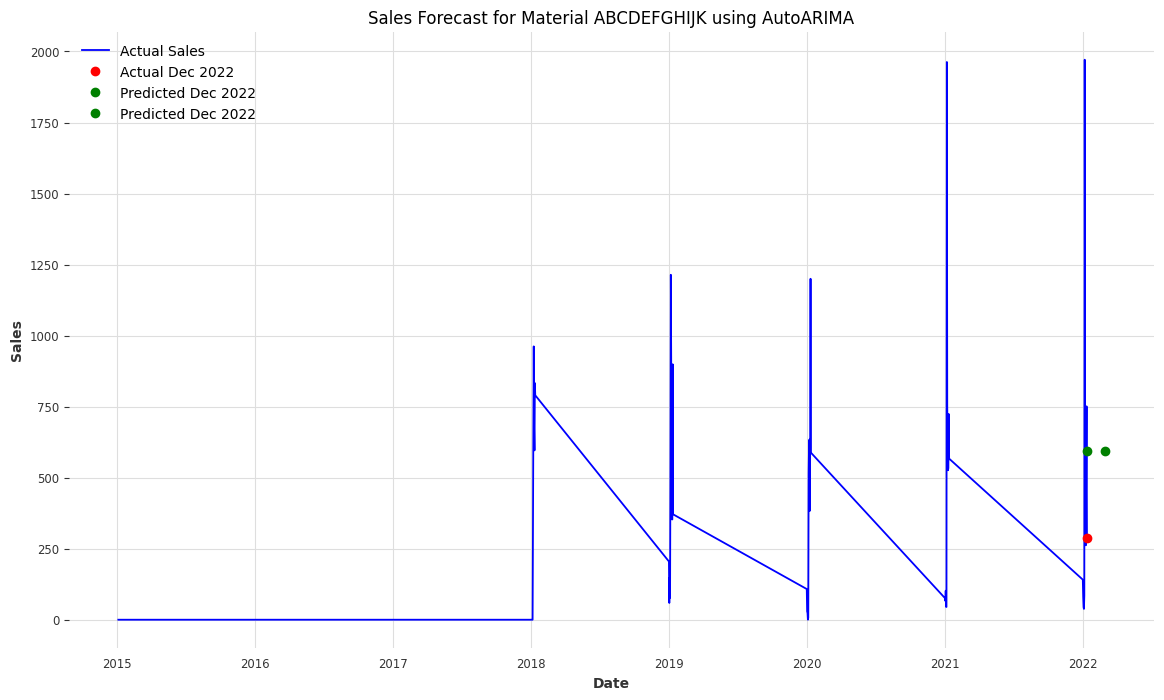

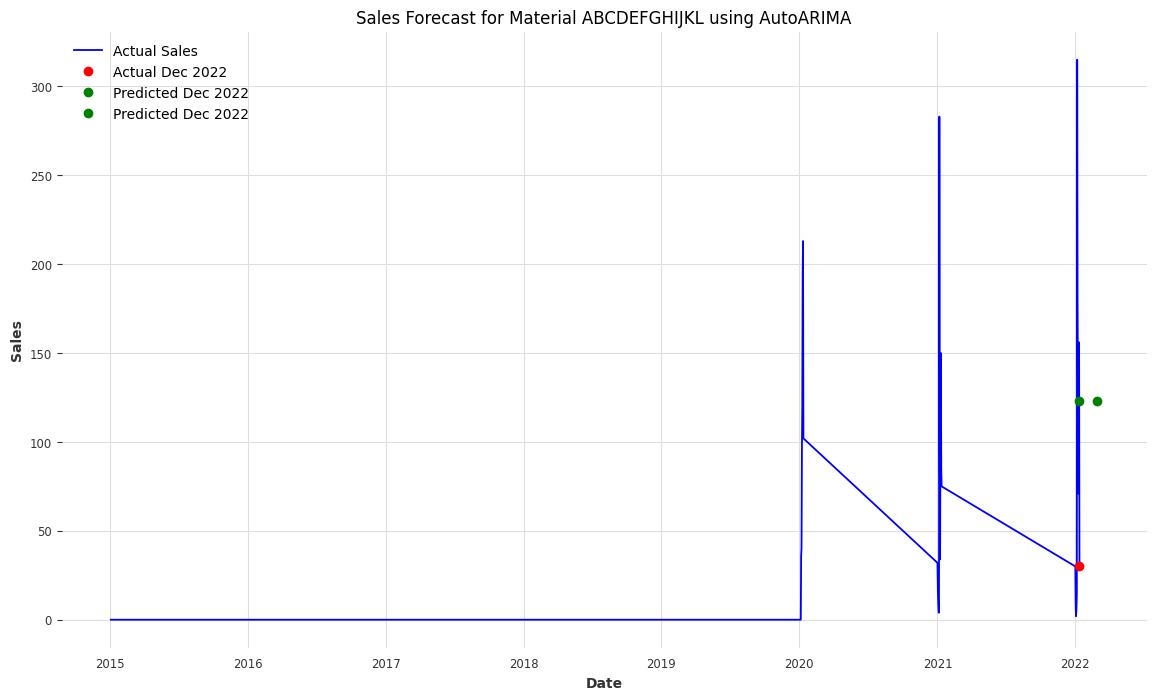

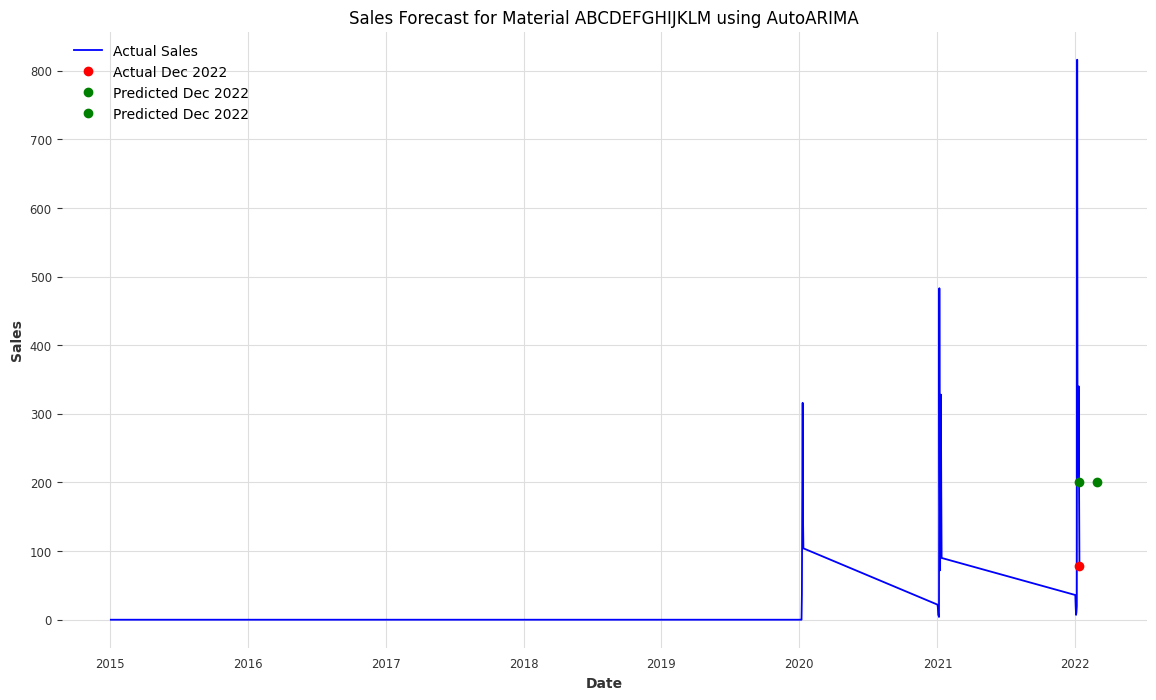

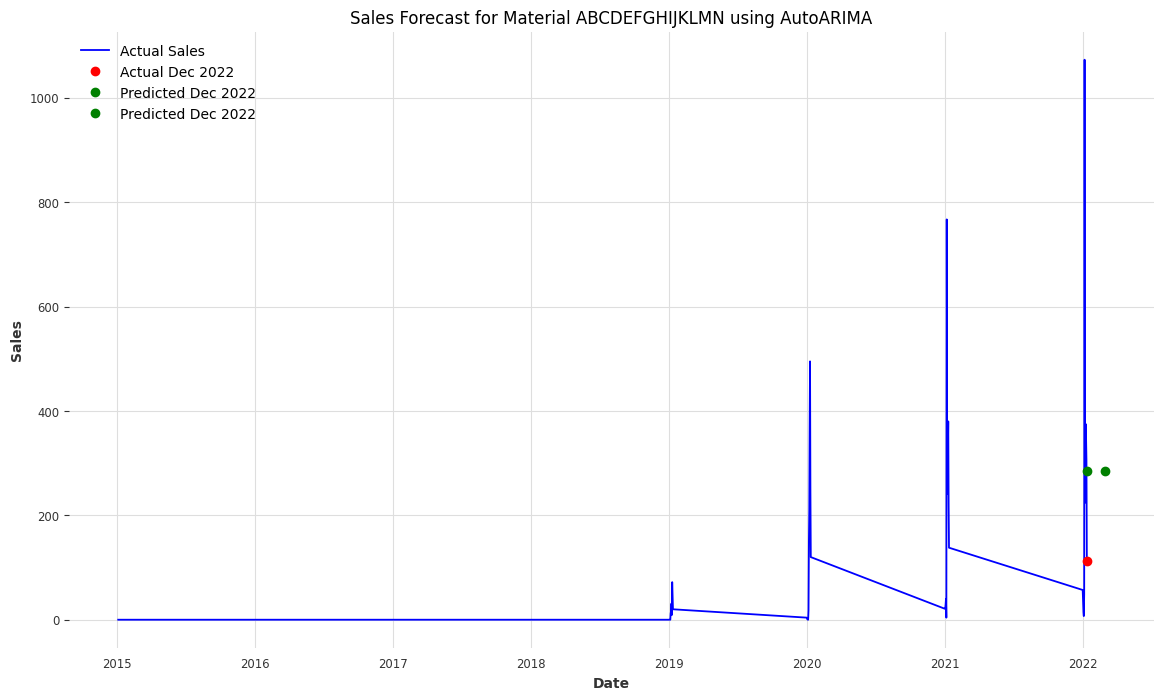

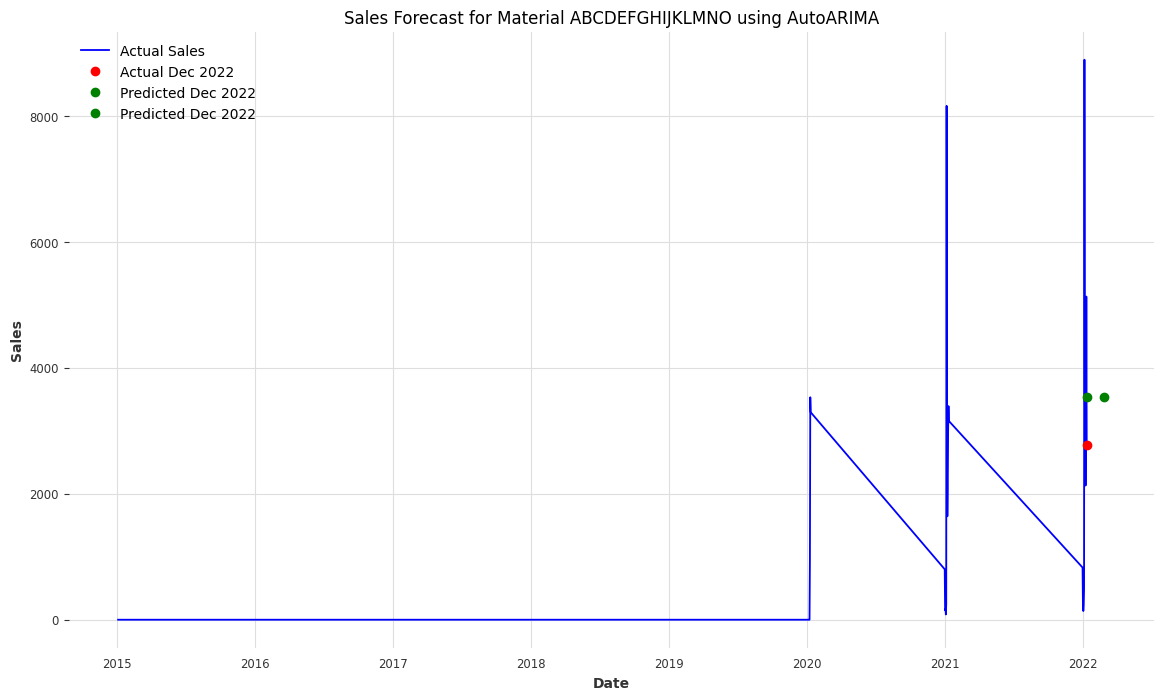

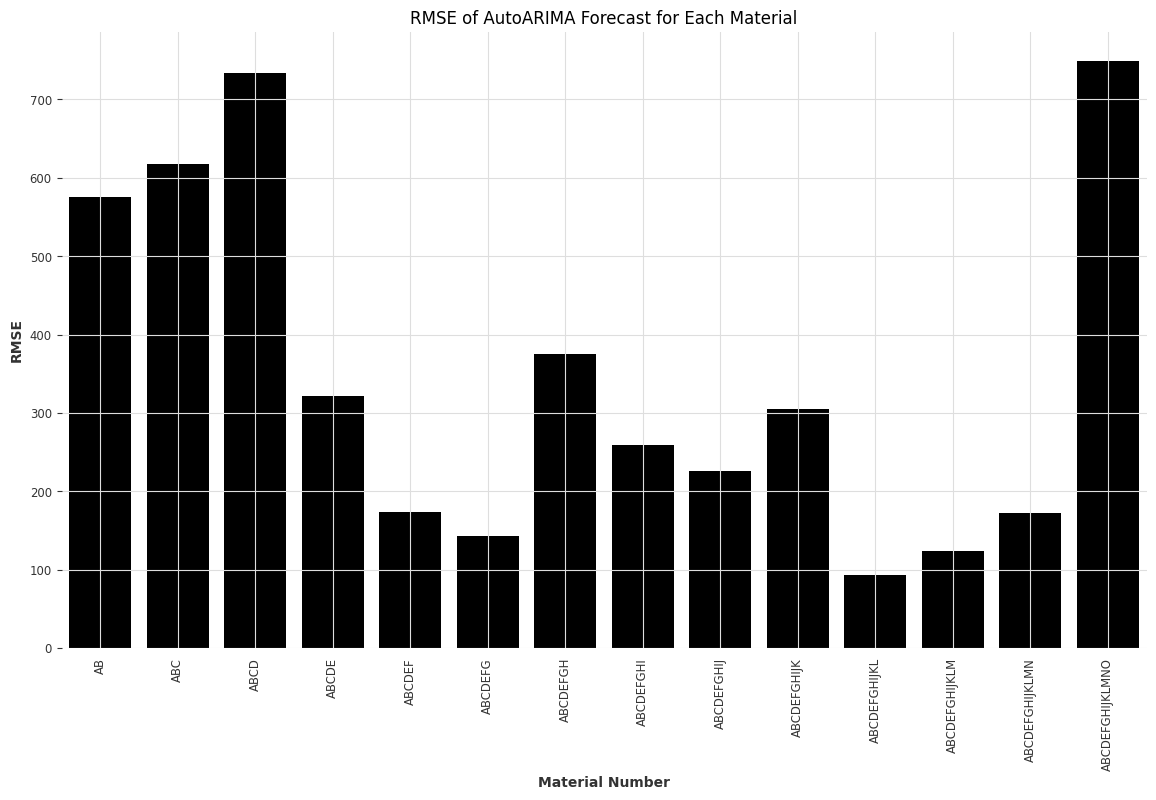

In [36]:
# Function to plot the results for a specific material using AutoARIMA
def plot_forecast_autoarima(df, material, actual, predicted):
    df_material = prepare_data(df, material)
    
    plt.figure(figsize=(14, 8))
    plt.plot(df_material.index, df_material['Sales'], label='Actual Sales', color='blue')
    plt.plot(df_material.index[-1:], actual, 'ro', label='Actual Dec 2022')
    plt.plot(df_material.index[-1:], predicted, 'go', label='Predicted Dec 2022')
    
    forecast_index = pd.date_range(start=df_material.index[-1], periods=2, freq='M')[1]
    plt.plot(forecast_index, predicted, 'go', label='Predicted Dec 2022')
    
    plt.title(f'Sales Forecast for Material {material} using AutoARIMA')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting results for all materials
for index, row in results_autoarima_df.iterrows():
    material = row['MaterialNumber']
    actual = row['Actual']
    predicted = row['Predicted']
    plot_forecast_autoarima(data, material, actual, predicted)

# Plot RMSE for all materials using AutoARIMA
plt.figure(figsize=(14, 8))
sns.barplot(x='MaterialNumber', y='RMSE', data=results_autoarima_df)
plt.title('RMSE of AutoARIMA Forecast for Each Material')
plt.xlabel('Material Number')
plt.ylabel('RMSE')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [37]:
# Function to plot the results for a specific material using tuned SARIMA (parallel)
def plot_forecast_sarima_tuned_parallel(df, material, actual, predicted):
    df_material = prepare_data(df, material)
    
    plt.figure(figsize=(14, 8))
    plt.plot(df_material.index, df_material['Sales'], label='Actual Sales', color='blue')
    plt.plot(df_material.index[-1:], actual, 'ro', label='Actual Dec 2022')
    plt.plot(df_material.index[-1:], predicted, 'go', label='Predicted Dec 2022')
    
    forecast_index = pd.date_range(start=df_material.index[-1], periods=2, freq='M')[1]
    plt.plot(forecast_index, predicted, 'go', label='Predicted Dec 2022')
    
    plt.title(f'Tuned SARIMA Parallel Sales Forecast for Material {material}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot RMSE for all materials
def plot_rmse_sarima_tuned_parallel(results_df):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='MaterialNumber', y='RMSE', data=results_df)
    plt.title('RMSE of Tuned SARIMA Parallel Forecast for Each Material')
    plt.xlabel('Material Number')
    plt.ylabel('RMSE')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


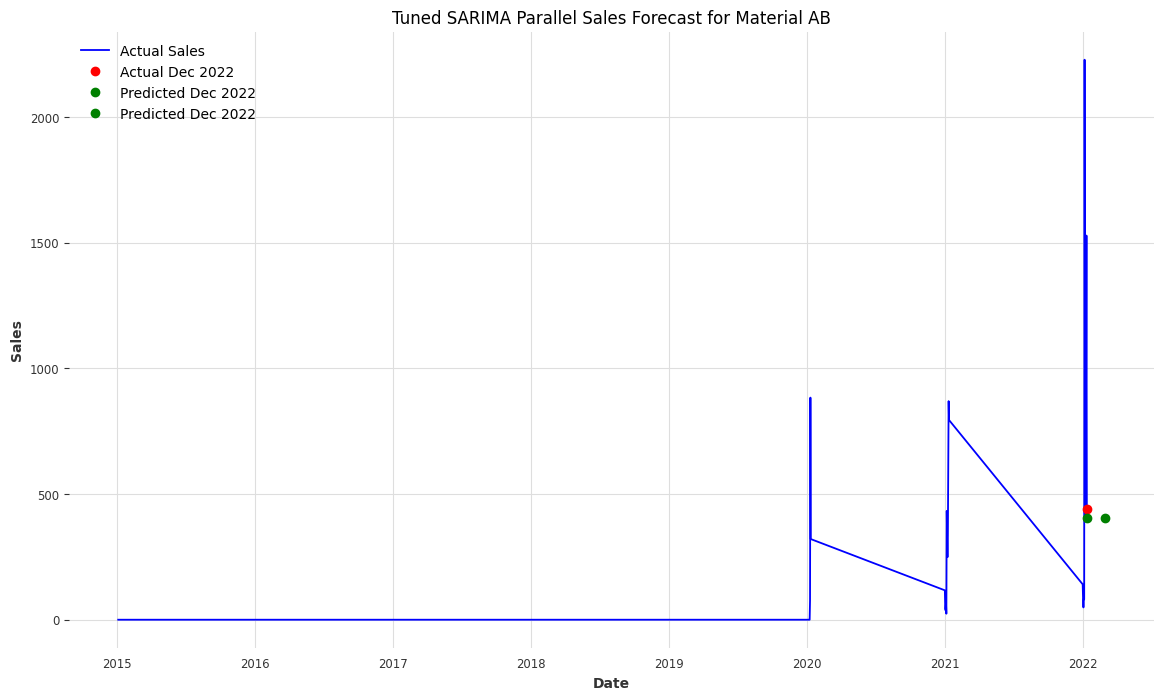

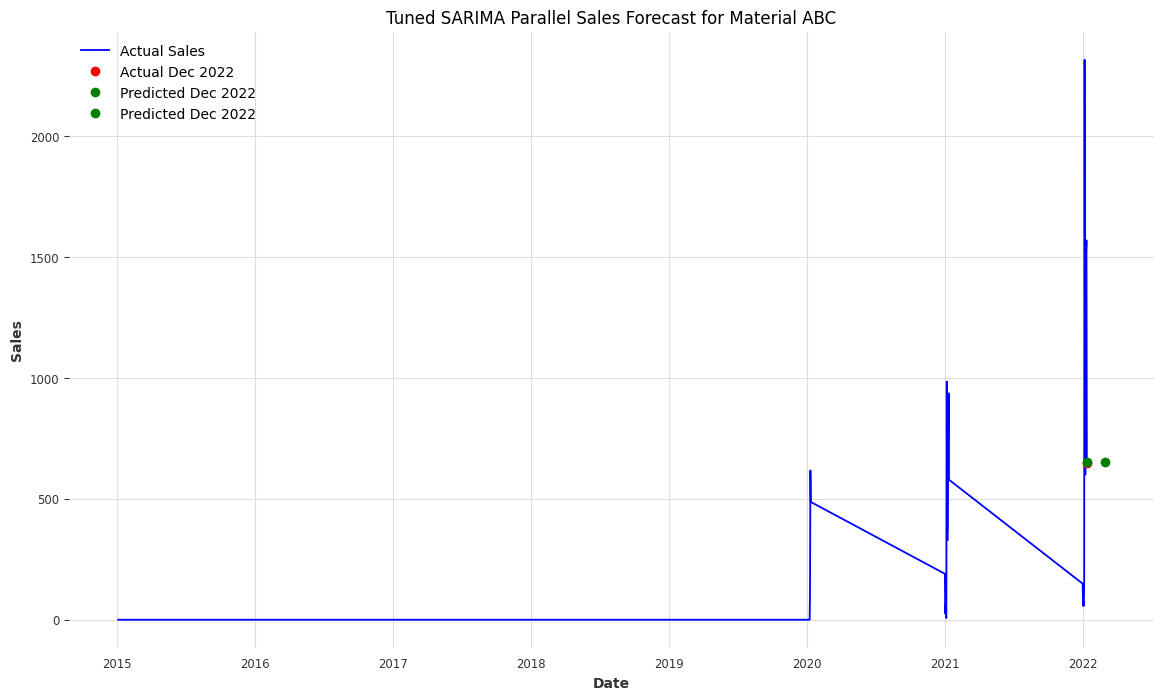

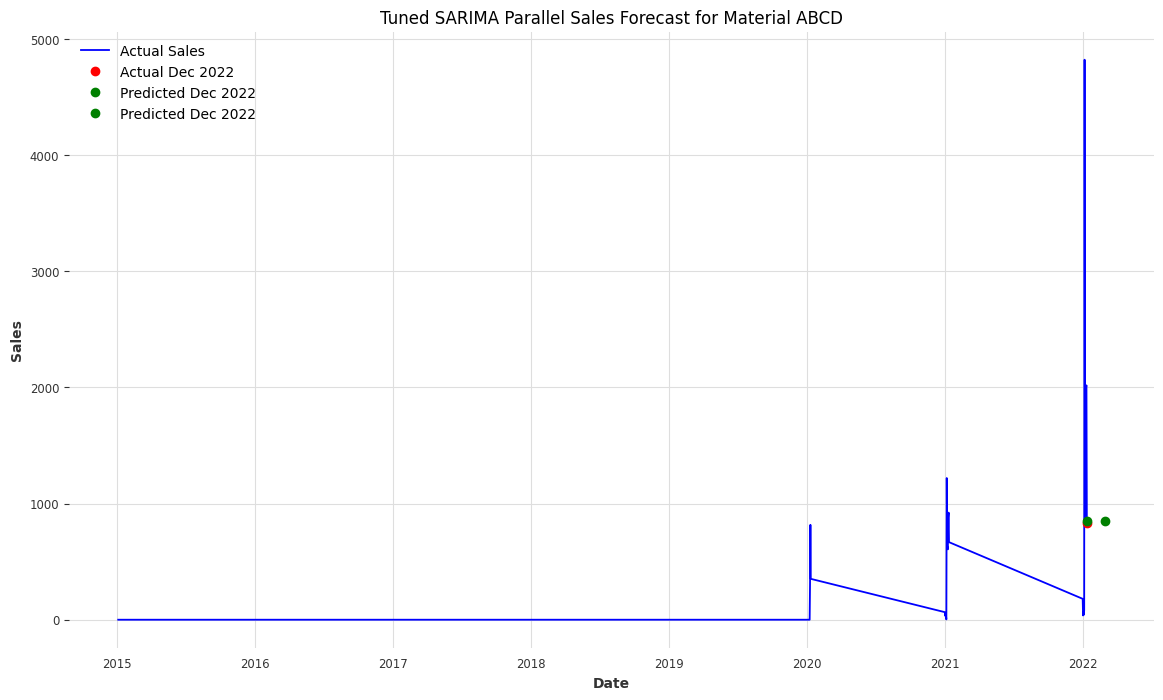

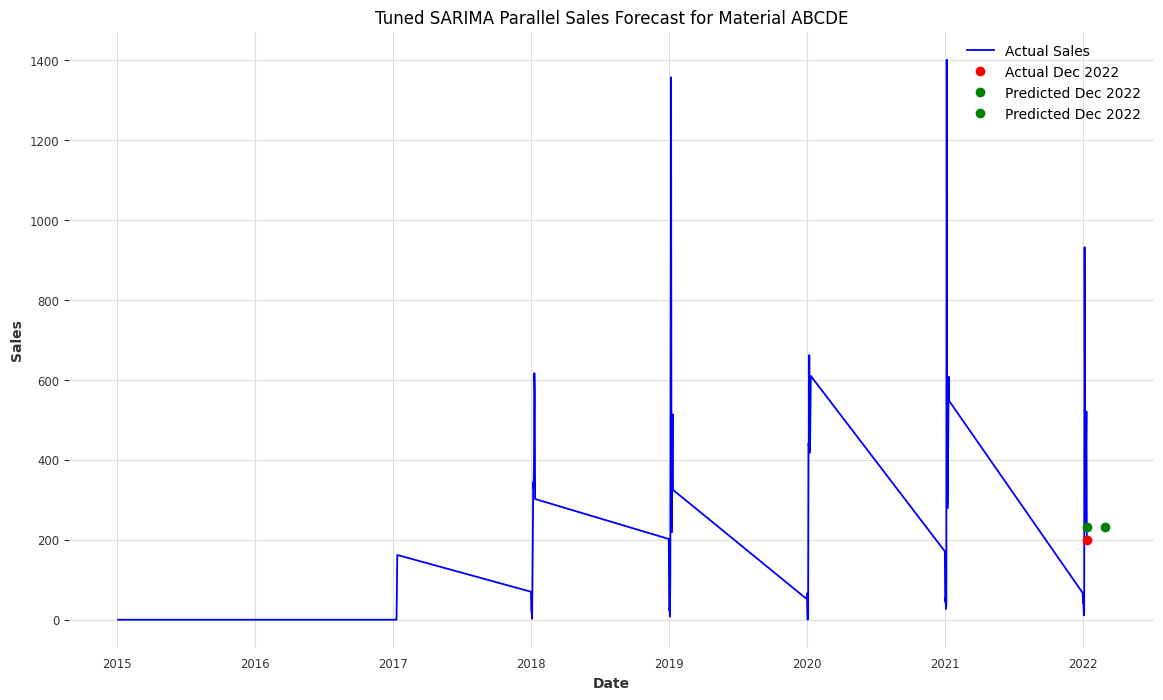

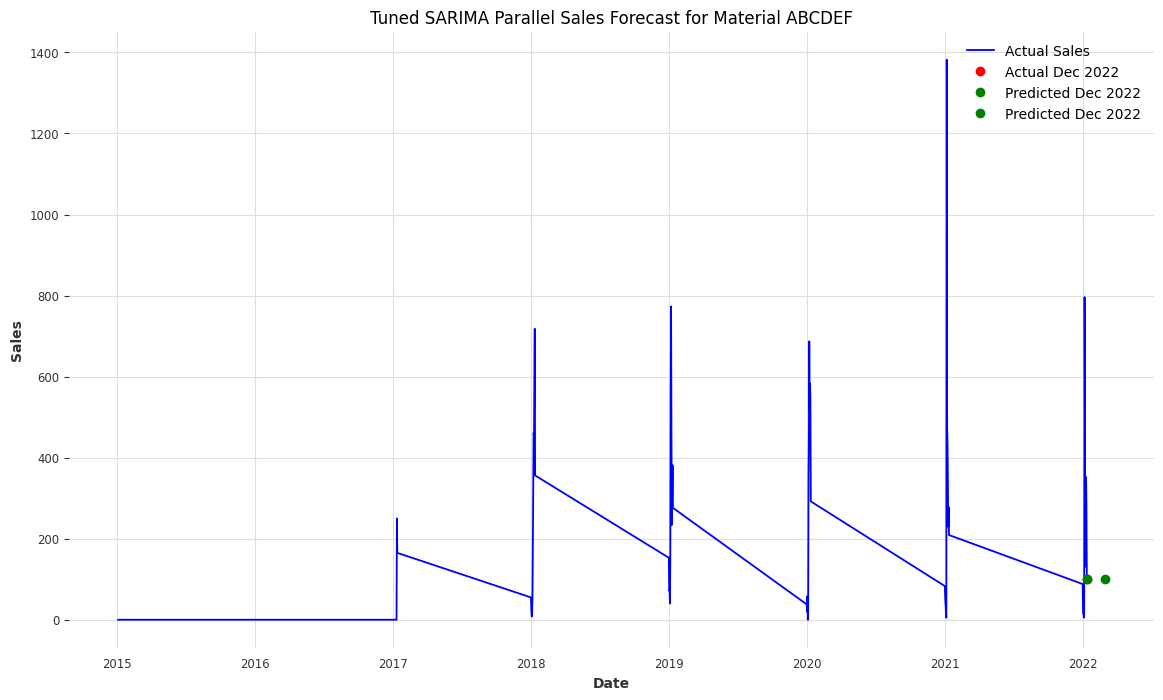

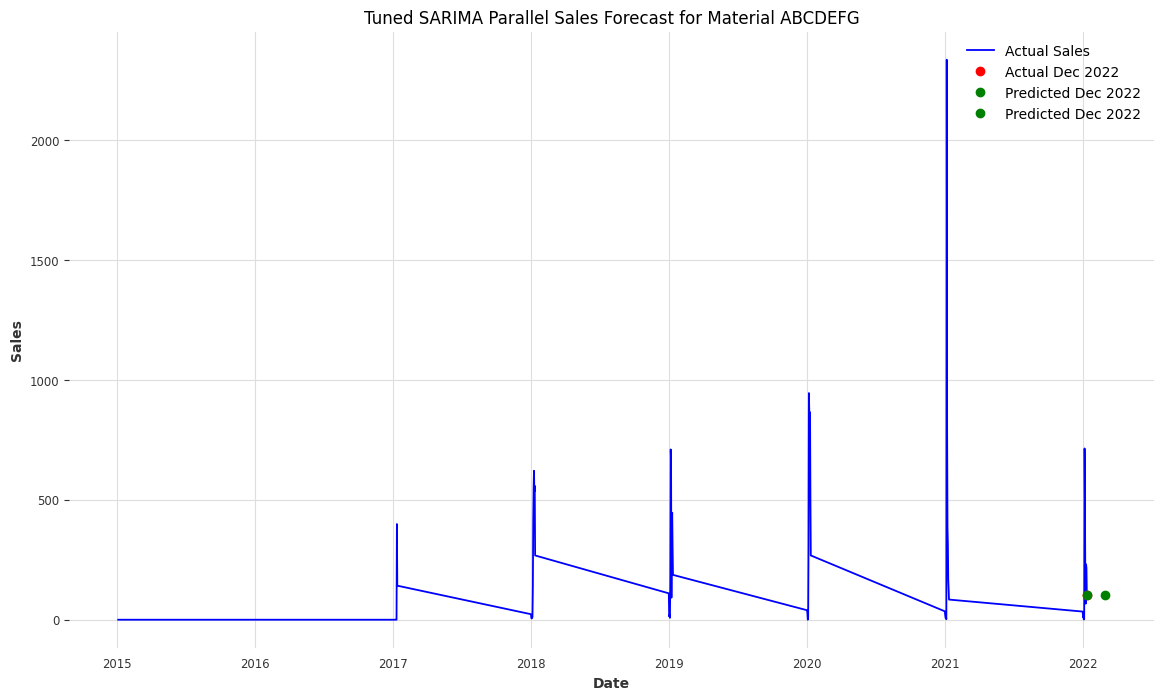

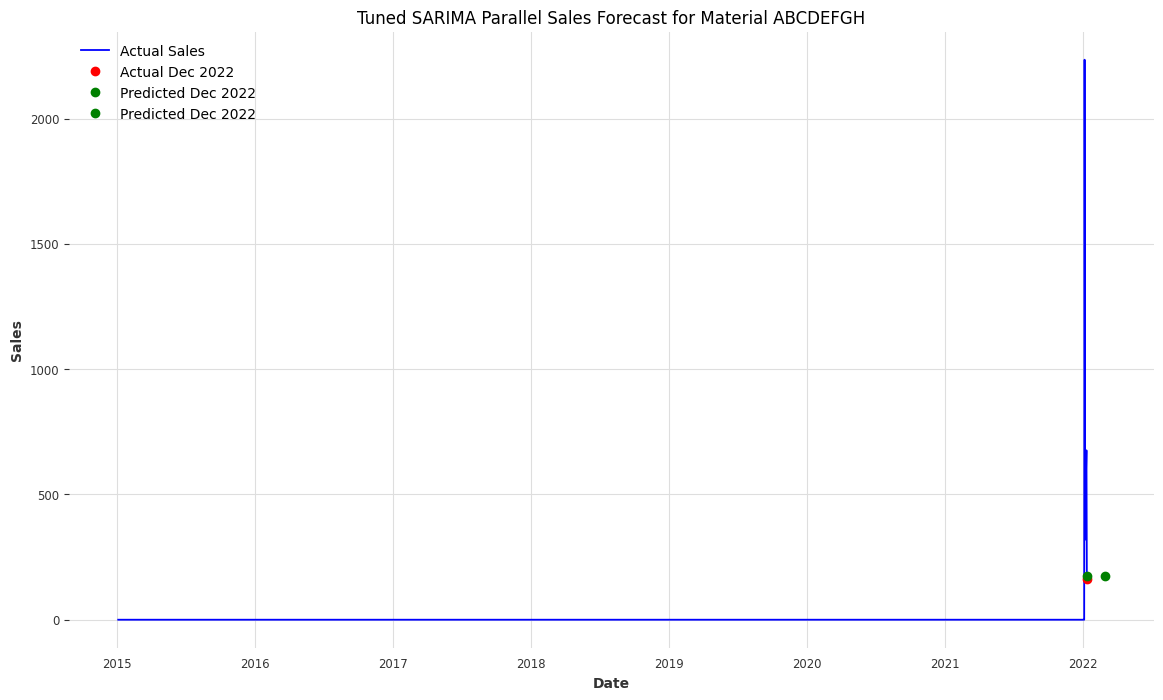

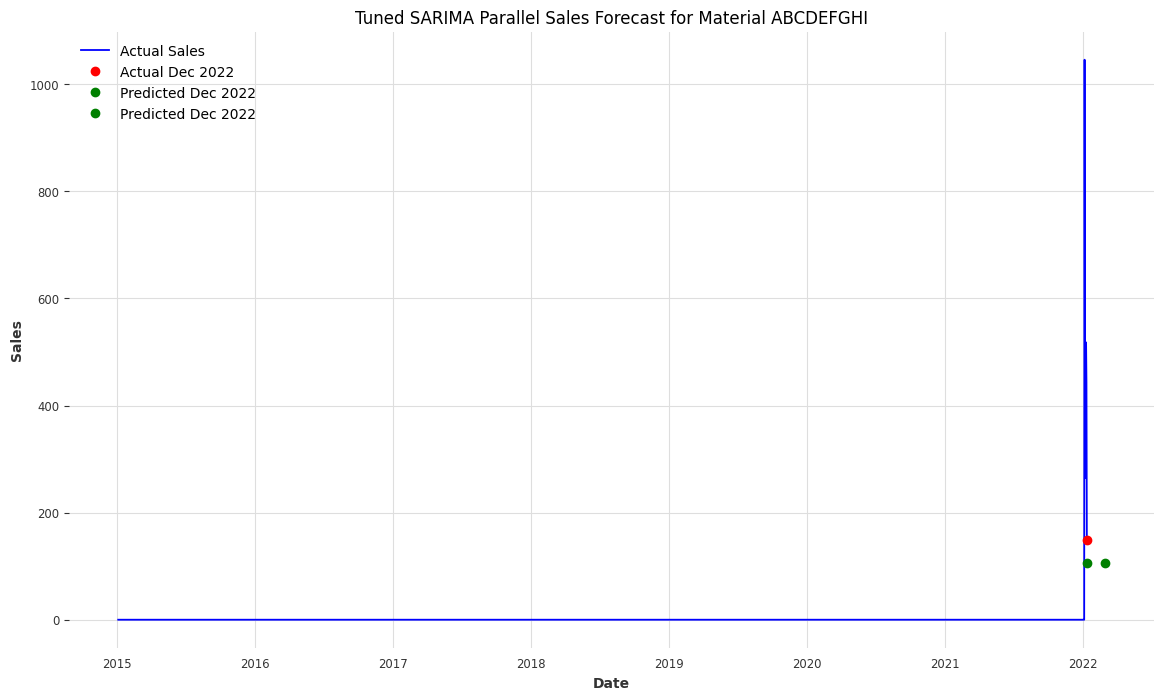

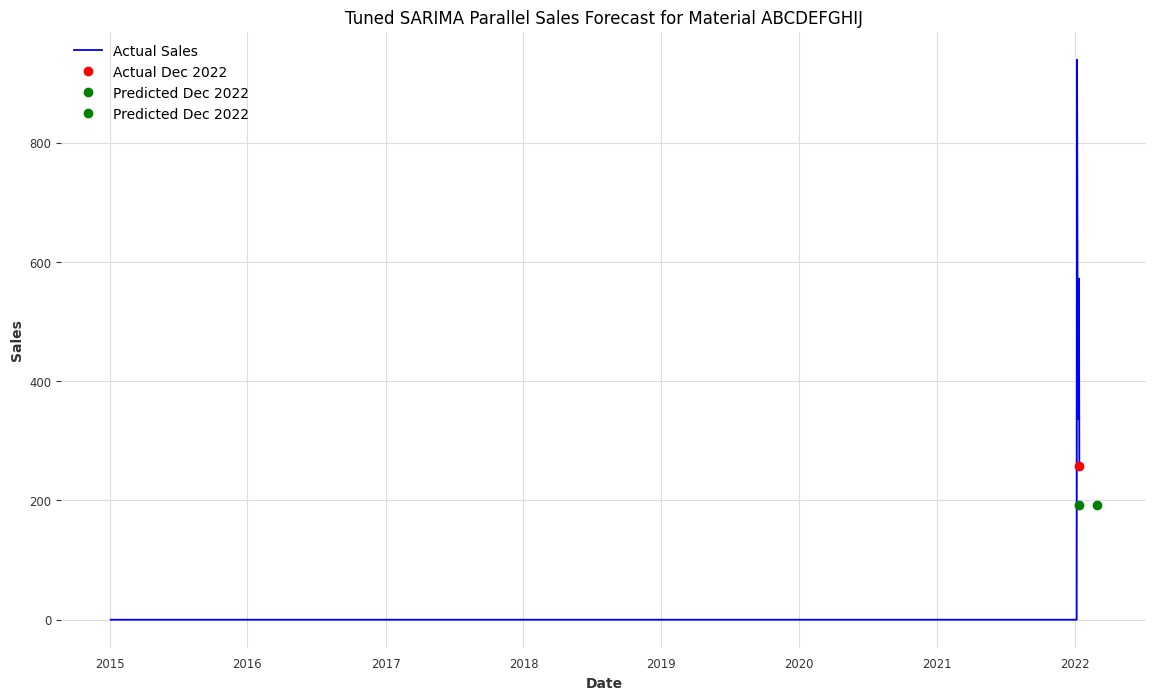

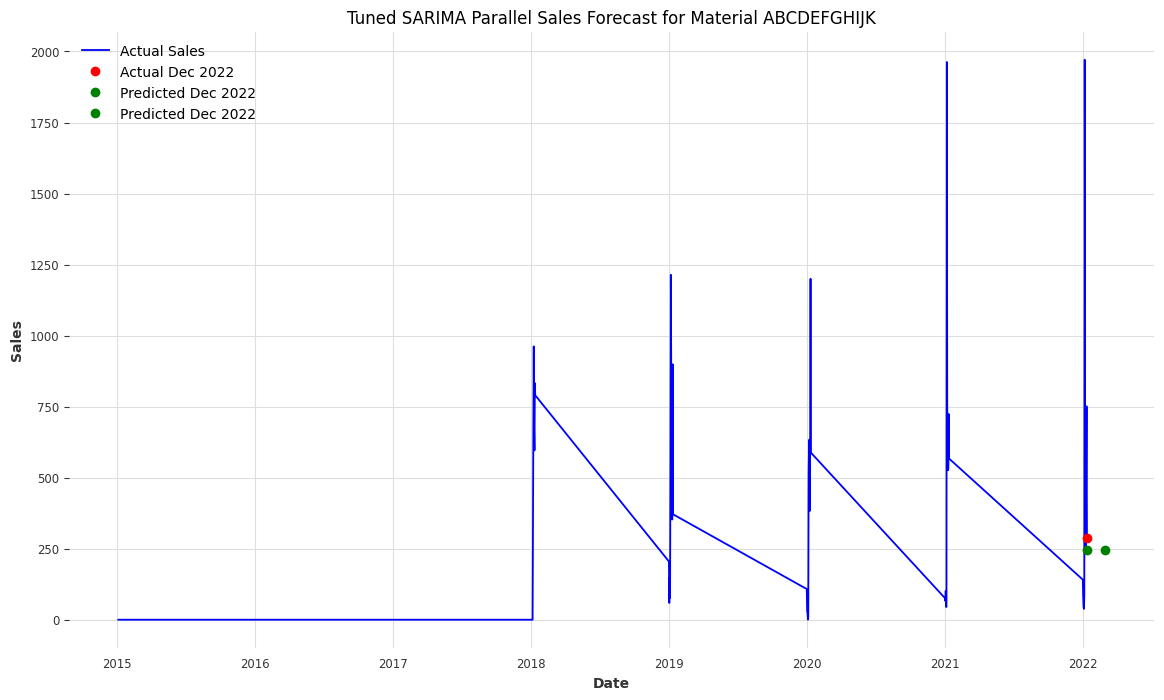

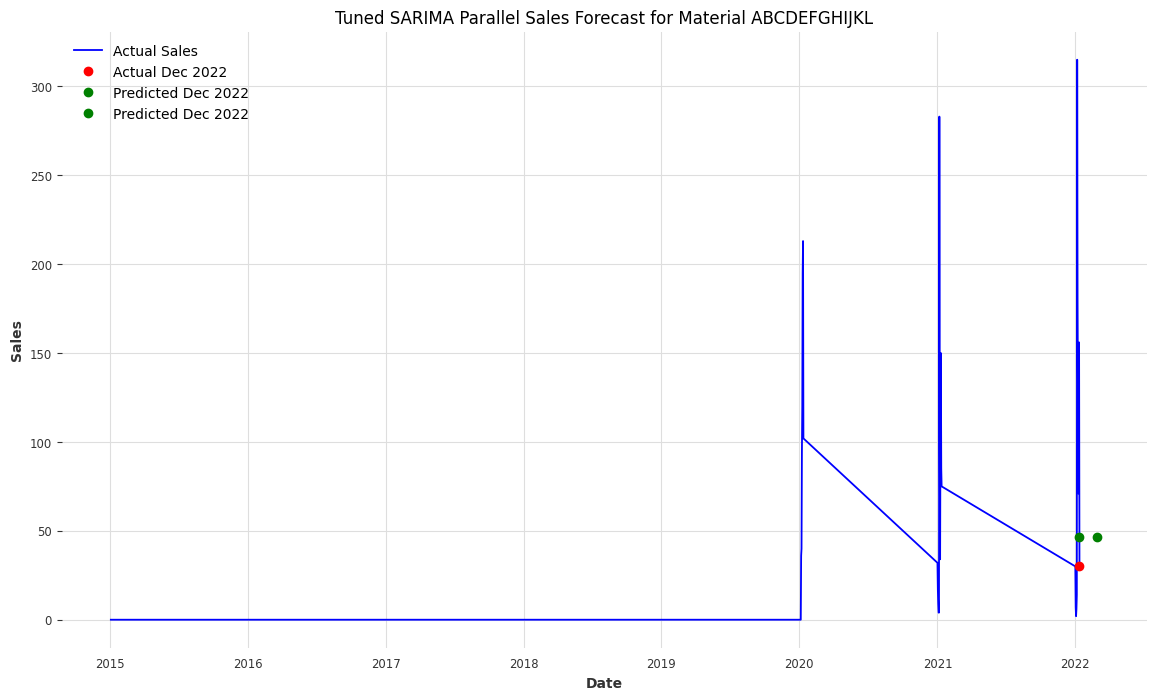

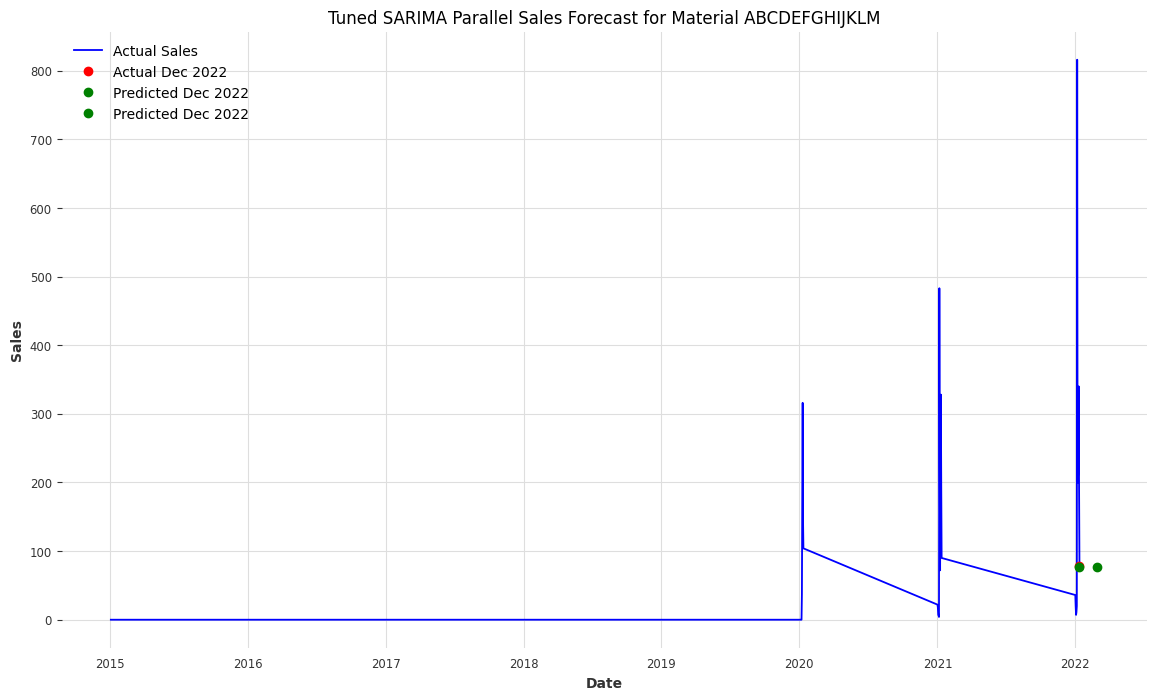

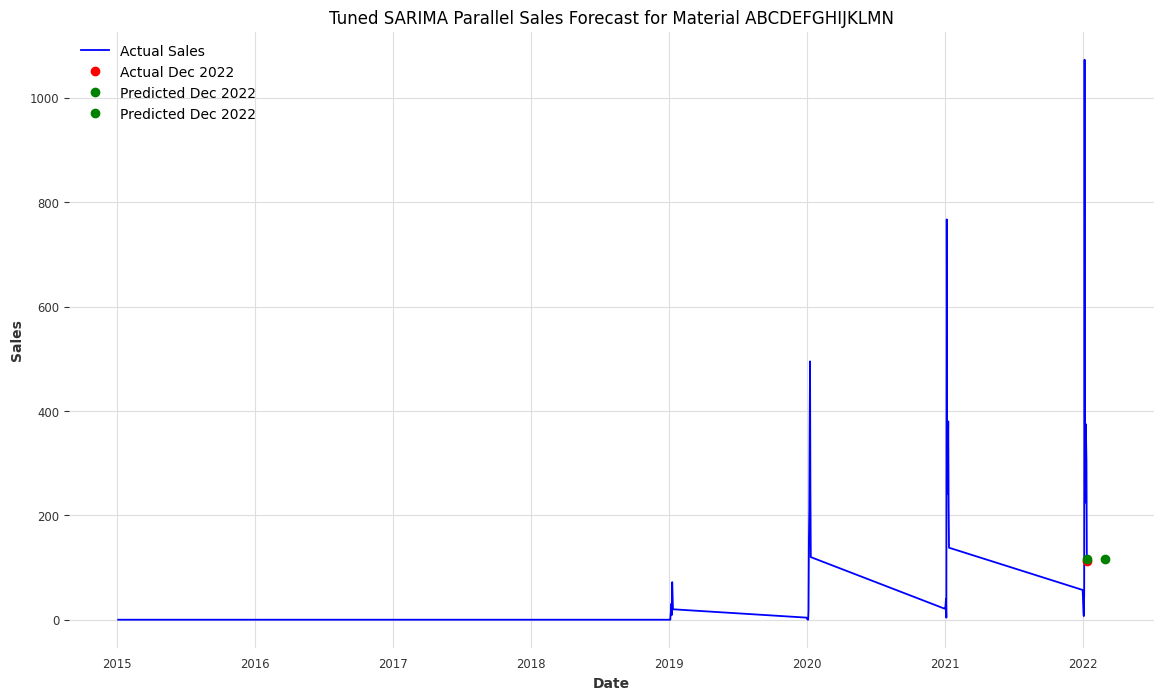

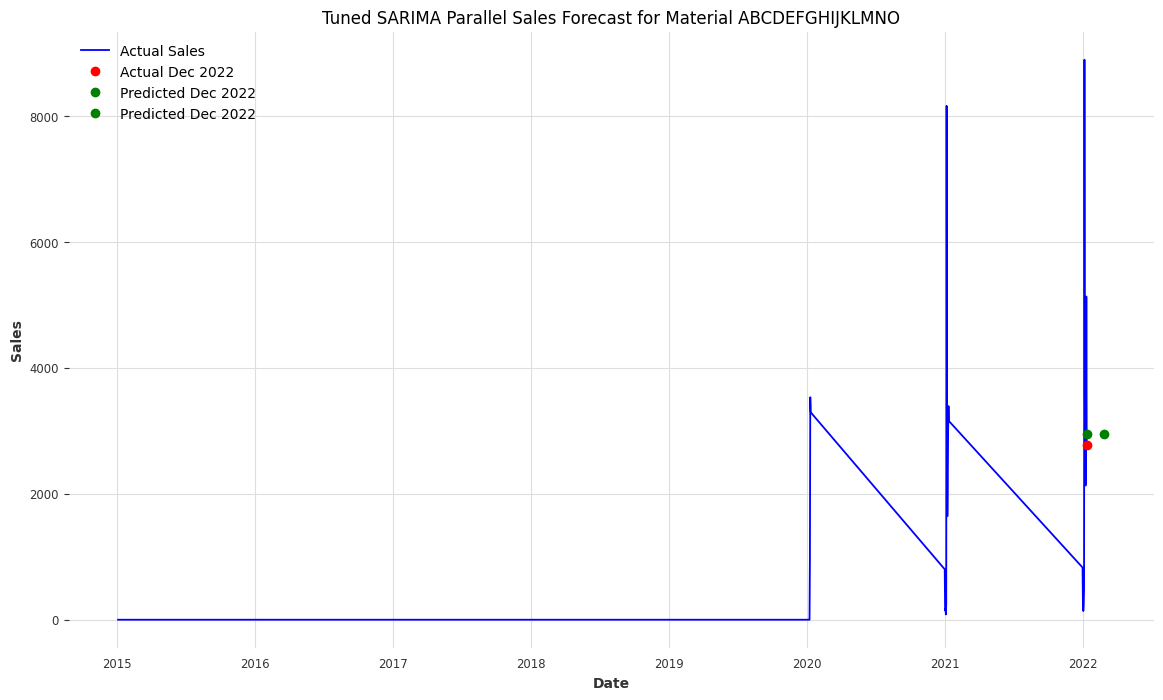

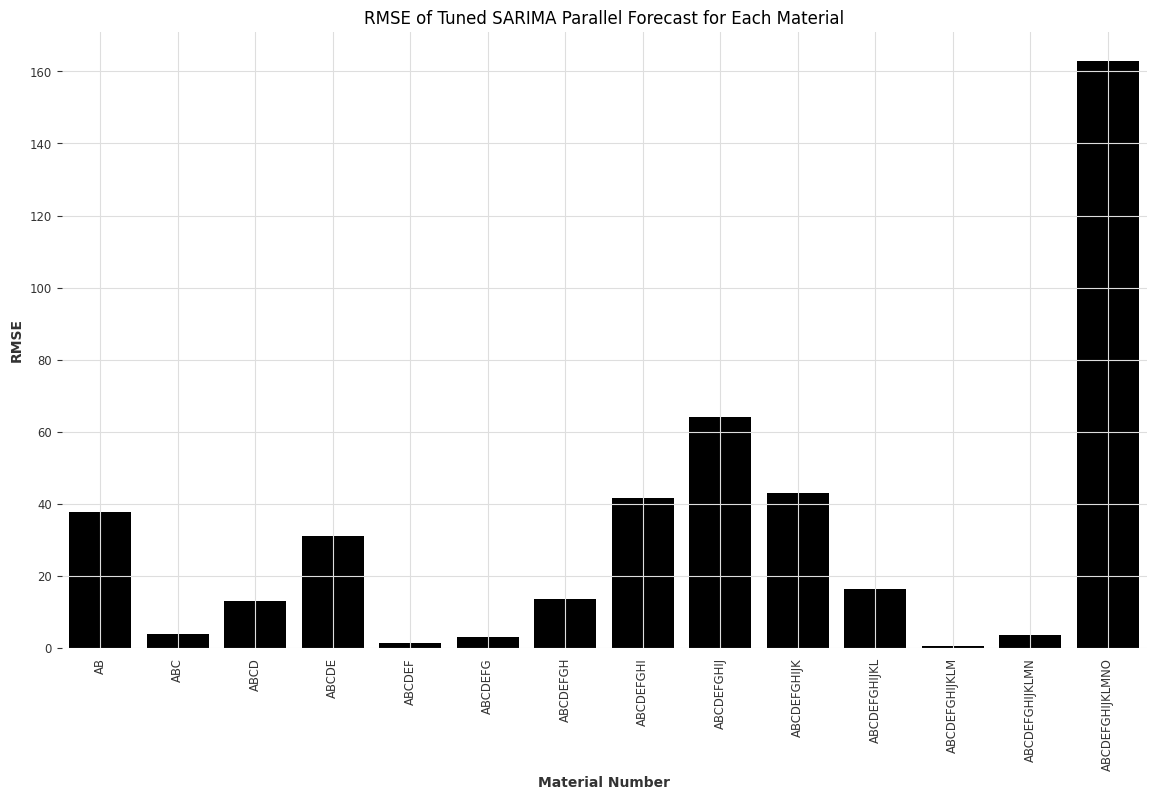

In [38]:
# Plotting results for all materials using tuned parallel SARIMA
for index, row in results_sarima_tuned_parallel_df.iterrows():
    material = row['MaterialNumber']
    actual = row['Actual']
    predicted = row['Predicted']
    plot_forecast_sarima_tuned_parallel(data, material, actual, predicted)

# Plot RMSE for all materials
plot_rmse_sarima_tuned_parallel(results_sarima_tuned_parallel_df)
